### Student Information
Name: 楊宏文

Student ID: NCKU-E84116277

GitHub ID: YANGMao9297

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## 2. Data Preparation


In [442]:
import pandas as pd
import numpy as np
import nltk
import sys
import math
import helpers.data_mining_helpers as dmh

Reddit_stock = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

print("Reddit 股票情感分析資料集載入成功!")
print(f"資料集形狀: {Reddit_stock.shape}")
print(f"欄位: {list(Reddit_stock.columns)}")

categories = ['positive', 'negative', 'neutral']    # 1.0, -1.0, 0.0
print(f"情感分類: {categories}")

Reddit 股票情感分析資料集載入成功!
資料集形狀: (847, 16)
欄位: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']
情感分類: ['positive', 'negative', 'neutral']


In [443]:
Reddit_stock['datetime'].values[0:5]

array(['2025-04-11 17:29:56', '2025-04-12 1:12:19', '2025-04-10 15:09:41',
       '2023-08-30 17:12:55', '2025-04-11 14:48:05'], dtype=object)

In [444]:
Reddit_stock['text'].values[0:5]    # 取前五筆資料

array(['Calls on retards',
       'Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.',
       'Seeing lots of red in the ticker.',
       "Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has achieved the unthinkable – a blazing 116 mph on water! This isn't just about speed; it's about propelling electric boating into a new era. Their cutting-edge technology, combined with Torrente's skill, is making waves that'll ripple for generations.\r\n\r\n**Highlight Main Points**\r\n\r\n* Vision Marine Technologies Inc. achieves a record-breaking 116 mph speed on water with Shaun Torrente.\r\n* The feat highlights the power of electric boating and pushes the limits of innovation.\r\n* Partners like Octillion Power Systems and Danfoss Editron contribute to this groundbreaking achievement.\r\n\r\n**TLDR**\r\n\r\nHold onto your seats – Vision Marine Te

In [445]:
Reddit_stock['text'][0:5]   # 取前五筆資料

0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
Name: text, dtype: object

In [446]:
print(Reddit_stock[['text', 'label']][0:5])
print(f"\nNumber of samples: {len(Reddit_stock)}")
print(f"Label types: {Reddit_stock['label'].unique()}")

# >>> Exercise 1 : 
print("\n=== Exercise 1: print out the first three samples ===")
for i in range(3):
    print(f"Example {i+1}:")
    print(f"Text: {Reddit_stock['text'].iloc[i]}")
    print(f"Label: {Reddit_stock['label'].iloc[i]}")
    print("-" * 30)

                                                text  label
0                                   Calls on retards   -1.0
1  Stunt as in like why did they even make a big ...    0.0
2                  Seeing lots of red in the ticker.    0.0
3  Vision Marine Technologies Inc. is rewriting t...    1.0
4                           He didn’t say thank you.   -1.0

Number of samples: 847
Label types: [-1.  0.  1.]

=== Exercise 1: print out the first three samples ===
Example 1:
Text: Calls on retards
Label: -1.0
------------------------------
Example 2:
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
Label: 0.0
------------------------------
Example 3:
Text: Seeing lots of red in the ticker.
Label: 0.0
------------------------------


## 3. Data Transformation

### 3.1 Converting Dictionary into Pandas Dataframe


In [447]:
X = pd.DataFrame()
X['datetime'] = Reddit_stock['datetime'].reset_index(drop=True)
X['datetime'] = pd.to_datetime(X['datetime']).dt.date   # Convert to date only
X['text'] = Reddit_stock['text'].reset_index(drop=True)
X['category'] = Reddit_stock['label'].reset_index(drop=True)

def format_sentiment_labels(label):
    if label == 1.0:
        return 'positive'
    elif label == 0.0:
        return 'neutral' 
    elif label == -1.0:
        return 'negative'
    else:
        return 'unknown'

X['category_name'] = X['category'].apply(format_sentiment_labels)
X

datetime                                               text  category  \
0    2025-04-11                                   Calls on retards      -1.0   
1    2025-04-12  Stunt as in like why did they even make a big ...       0.0   
2    2025-04-10                  Seeing lots of red in the ticker.       0.0   
3    2023-08-30  Vision Marine Technologies Inc. is rewriting t...       1.0   
4    2025-04-11                           He didn’t say thank you.      -1.0   
..          ...                                                ...       ...   
842  2021-06-30        Invest now it is going to shoot up tomorrow       1.0   
843  2025-04-11                             Where can I read this?       0.0   
844  2025-03-24  Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...       0.0   
845  2025-04-11  i sold my puts so i expect cheeto to declare w...      -1.0   
846  2025-04-12                       ![img](emote|t5_2th52|31224)       0.0   

    category_name  
0        negative  
1         neutral  
2         neutral  
3        positive  
4        negative  
..            ...  
842      positive  
843       neutral  
844       neutral  
845      negative  
846       neutral  

[847 rows x 4 columns]

In [448]:
# >>> Exercise 2: 實驗不同的查詢技術
# 簡單查詢 - 前10筆記錄，只保留 text 和 category_name
print("1. 簡單查詢 - 前10筆的文本和分類:")
simple_query = X[:10][["text", "category_name"]]
print(simple_query.head())

# 使用 loc 查詢 (by label)
print("\n2. 使用 loc 查詢前10筆的文本:")
loc_query = X.loc[:10, 'text']
print(loc_query.head())

# 使用 iloc 查詢 (by position) 
print("\n3. 使用 iloc 查詢前10筆的文本:")
iloc_query = X.iloc[:10, 1]  # 1是text欄位的位置
print(iloc_query.head())

# 使用 query 方法 (Pandas 的方法)
print("\n使用 query 方法查詢負面情感:")
negative_query = X.query('category_name == "negative"')[::10][0:5]
print(negative_query[["text", "category_name"]])

1. 簡單查詢 - 前10筆的文本和分類:
                                                text category_name
0                                   Calls on retards      negative
1  Stunt as in like why did they even make a big ...       neutral
2                  Seeing lots of red in the ticker.       neutral
3  Vision Marine Technologies Inc. is rewriting t...      positive
4                           He didn’t say thank you.      negative

2. 使用 loc 查詢前10筆的文本:
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4                             He didn’t say thank you.
Name: text, dtype: object

3. 使用 iloc 查詢前10筆的文本:
0                                     Calls on retards
1    Stunt as in like why did they even make a big ...
2                    Seeing lots of red in the ticker.
3    Vision Marine Technologies Inc. is rewriting t...
4         

In [449]:
# >>> Exercise 3: 查詢屬於正面情感的記錄，每10筆取一筆，只顯示前5筆
print("\n=== Exercise 3: 特定情感類別查詢 ===")
positive_query = X[X["category_name"] == "positive"][::10][0:5]
print("正面情感記錄 (每10筆取1筆，前5筆):")
print(positive_query[["text", "category_name"]])


=== Exercise 3: 特定情感類別查詢 ===
正面情感記錄 (每10筆取1筆，前5筆):
                                                  text category_name
3    Vision Marine Technologies Inc. is rewriting t...      positive
78   I think it’s gonna work itself out. I bought t...      positive
168  The obvious can also be refreshing from CNBC: ...      positive
219  Same. Back to break even after that last rip b...      positive
319  Etrade has a feed of news articles about how r...      positive


## 4. Data Mining using Pandas
檢查和處理缺失值、重複資料

### 4.1 Missing Values

In [450]:
# 檢查缺失值
X.isnull()

datetime   text  category  category_name
0       False  False     False          False
1       False  False     False          False
2       False  False     False          False
3       False  False     False          False
4       False  False     False          False
..        ...    ...       ...            ...
842     False  False     False          False
843     False  False     False          False
844     False  False     False          False
845     False  False     False          False
846     False  False     False          False

[847 rows x 4 columns]

In [451]:
X.isnull().sum()

datetime         0
text             0
category         0
category_name    0
dtype: int64

In [452]:
# 使用 helper 函數檢查缺失值（和 axis=0 相同，按欄計算缺失值）
X.isnull().apply(lambda x: dmh.check_missing_values(x))

datetime                                text  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                             category                       category_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [453]:
# >>> Exercise 4: 按行計算缺失值（axis=1）
X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### 4.2 Dealing with Duplicate Data

In [454]:
# 檢查完整重複資料
print("1. 完整資料重複檢查:")
duplicate_mask = X.duplicated()
print(f"完整重複資料數: {duplicate_mask.sum()}")

if duplicate_mask.sum() > 0:
    print("重複的資料:")
    print(X[duplicate_mask])
else:
    print("無完整重複資料")

# 檢查基於文本內容的重複
print("\n2. 基於文本內容的重複檢查:")
text_duplicate_mask = X.duplicated(subset=['text'])
print(f"文本重複資料數: {text_duplicate_mask.sum()}")

if text_duplicate_mask.sum() > 0:
    print("\n對應的原始資料:")
    for idx, row in X[text_duplicate_mask].iterrows():
        original_records = X[X['text'] == row['text']]
        print(f"\n重複文本: '{row['text'][:50]}...'")
        print(f"出現次數: {len(original_records)}")
        print(original_records[['text', 'category_name']])
        print("-" * 40)
else:
    print("無基於文本的重複記錄")

# 統計摘要
print(f"\n=== 重複資料統計摘要 ===")
print(f"原始記錄總數: {len(X)}")
print(f"文本內容重複: {text_duplicate_mask.sum()}")
print(f"唯一文本數量: {X['text'].nunique()}")

# 移除重複資料 (保留第一個)
X = X.drop_duplicates(subset=['text'], keep='first').reset_index(drop=True)
print(f"重複文本已刪除，並保留第一個，處理後資料筆數: {len(X)}")

1. 完整資料重複檢查:
完整重複資料數: 1
重複的資料:
      datetime                                               text  category  \
42  2021-02-01  So they went from saying redditors are bad for...       1.0   

   category_name  
42      positive  

2. 基於文本內容的重複檢查:
文本重複資料數: 23

對應的原始資料:

重複文本: 'So they went from saying redditors are bad for man...'
出現次數: 2
                                                 text category_name
34  So they went from saying redditors are bad for...      positive
42  So they went from saying redditors are bad for...      positive
----------------------------------------

重複文本: 'Updated Daily by EOD

  
[Daily Shorts]()...'
出現次數: 4
                                                  text category_name
70   Updated Daily by EOD\r\n\r\n  \r\n[Daily Short...       neutral
349  Updated Daily by EOD\r\n\r\n  \r\n[Daily Short...       neutral
520  Updated Daily by EOD\r\n\r\n  \r\n[Daily Short...       neutral
697  Updated Daily by EOD\r\n\r\n  \r\n[Daily Short...       neutral
----------

## 5. 資料預處理 (Data Preprocessing)
包括取樣、特徵創建和文本轉換

### 5.1 Sampling

In [455]:
# >>> Exercise 6: Sampling 分析
print(f"\n=== Exercise 6: Sampling 分析 ===")
X_sample = X.sample(n=200)  # random state，若要固定結果可加 random_state=42

print(f'X 原始資料 {X.category_name.value_counts()}')
print('-----')
print(f'X 原始比例 {round(X.category_name.value_counts()/len(X), 2)}')
print("=====")
print(f'X_sample 樣本資料 {X_sample.category_name.value_counts()}')
print('-----')
print(f'X_sample 樣本比例 {round(X_sample.category_name.value_counts()/len(X_sample), 2)}')

print("\n因為是隨機取樣，所以每次結果會略有不同")


=== Exercise 6: Sampling 分析 ===
X 原始資料 category_name
neutral     401
negative    315
positive    108
Name: count, dtype: int64
-----
X 原始比例 category_name
neutral     0.49
negative    0.38
positive    0.13
Name: count, dtype: float64
=====
X_sample 樣本資料 category_name
neutral     101
negative     70
positive     29
Name: count, dtype: int64
-----
X_sample 樣本比例 category_name
neutral     0.50
negative    0.35
positive    0.14
Name: count, dtype: float64

因為是隨機取樣，所以每次結果會略有不同


X:
category_name
neutral     401
negative    315
positive    108
Name: count, dtype: int64
-----
X_sample (Sorted to match X):
category_name
neutral     101
negative     70
positive     29
Name: count, dtype: int64

-----
X_sample (Sorted to match X):
category_name
neutral     101
negative     70
positive     29
Name: count, dtype: int64


X:
category_name
neutral     401
negative    315
positive    108
Name: count, dtype: int64
-----
X_sample (Sorted to match X):
category_name
neutral     101
negative     70
positive     29
Name: count, dtype: int64

-----
X_sample (Sorted to match X):
category_name
neutral     101
negative     70
positive     29
Name: count, dtype: int64


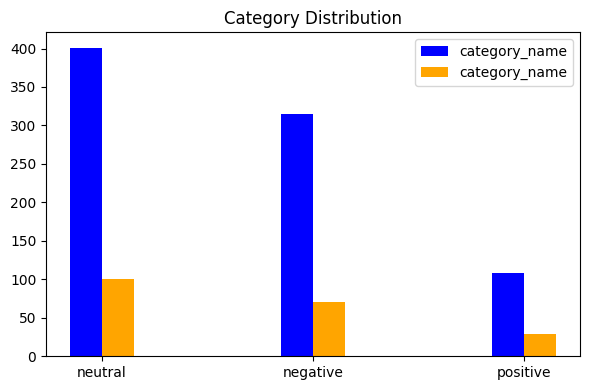

In [456]:
# Exercise 8: 視覺化 Sampling 結果
import matplotlib.pyplot as plt
import numpy as np

# Get the value counts, which are already sorted by frequency in descending order
X_counts = X.category_name.value_counts()
# Reindex the sample counts to match the order of the full dataset, filling missing values with 0
X_sample_counts = X_sample.category_name.value_counts().reindex(X.category_name.value_counts().index, fill_value=0)

# Get the sorted category names for the x-axis labels
sorted_categories = X.category_name.value_counts().index

print(f"X:\n{X_counts}")
print("-----")
print(f"X_sample (Sorted to match X):\n{X_sample_counts}")

# plot barchart for X and X_sample in the one chart
x = np.arange(len(sorted_categories))
width_x = 0.15  # Adjusted width for better spacing

fig, ax = plt.subplots(figsize=(6, 4)) # Made the figure wider for readability
# Plot using the sorted data
bar_X = ax.bar(x - width_x/2, X_counts, width=width_x, label='category_name', color='blue')
bar_X_sample = ax.bar(x + width_x/2, X_sample_counts, width=width_x, label='category_name', color='orange')

ax.set_title('Category Distribution')
# ax.set_ylabel('Number of Documents')
ax.set_xticks(x)
ax.set_xticklabels(sorted_categories) # Rotate labels to prevent overlap

ax.legend()
fig.tight_layout() # Adjust layout to make room for rotated labels
plt.show()

### 5.2 Feature Creation

In [457]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ybcvx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ybcvx\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [458]:
X[0:4]["unigrams"]

0                                 [Calls, on, retards]
1    [Stunt, as, in, like, why, did, they, even, ma...
2          [Seeing, lots, of, red, in, the, ticker, .]
3    [Vision, Marine, Technologies, Inc., is, rewri...
Name: unigrams, dtype: object

In [459]:
X[0:4]

datetime                                               text  category  \
0  2025-04-11                                   Calls on retards      -1.0   
1  2025-04-12  Stunt as in like why did they even make a big ...       0.0   
2  2025-04-10                  Seeing lots of red in the ticker.       0.0   
3  2023-08-30  Vision Marine Technologies Inc. is rewriting t...       1.0   

  category_name                                           unigrams  
0      negative                               [Calls, on, retards]  
1       neutral  [Stunt, as, in, like, why, did, they, even, ma...  
2       neutral        [Seeing, lots, of, red, in, the, ticker, .]  
3      positive  [Vision, Marine, Technologies, Inc., is, rewri...

### 5.3 Feature Subset Selection

In [460]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

print(X_counts[1])

  (np.int32(0), np.int32(3696))	1
  (np.int32(0), np.int32(388))	1
  (np.int32(0), np.int32(2024))	2
  (np.int32(0), np.int32(2310))	1
  (np.int32(0), np.int32(4244))	1
  (np.int32(0), np.int32(1168))	1
  (np.int32(0), np.int32(3858))	1
  (np.int32(0), np.int32(1409))	1
  (np.int32(0), np.int32(2402))	1
  (np.int32(0), np.int32(538))	1
  (np.int32(0), np.int32(1083))	1
  (np.int32(0), np.int32(175))	2
  (np.int32(0), np.int32(3628))	1
  (np.int32(0), np.int32(2161))	1
  (np.int32(0), np.int32(3848))	1
  (np.int32(0), np.int32(1568))	1
  (np.int32(0), np.int32(2878))	1
  (np.int32(0), np.int32(2645))	1
  (np.int32(0), np.int32(887))	1
  (np.int32(0), np.int32(3477))	1
  (np.int32(0), np.int32(1412))	2
  (np.int32(0), np.int32(3795))	1
  (np.int32(0), np.int32(2918))	1


In [461]:
# >>> Exercise 9
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['calls', 'on', 'retards']

In [462]:
X_counts.shape

(824, 4346)

In [463]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [464]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [465]:
# >>> Exercise 10
# print(X_counts[3, 0:100].toarray())
# print(count_vect.get_feature_names_out()[X_counts[3, 0:100].toarray()])
print(X_counts[3,0:100])
print(f'The \"{X_counts[3, 18]}\" at the beginning of the fourth record represents the \"{count_vect.get_feature_names_out()[18]}\" appears three times in the document.')

  (np.int32(0), np.int32(18))	3
The "3" at the beginning of the fourth record represents the "116" appears three times in the document.


There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


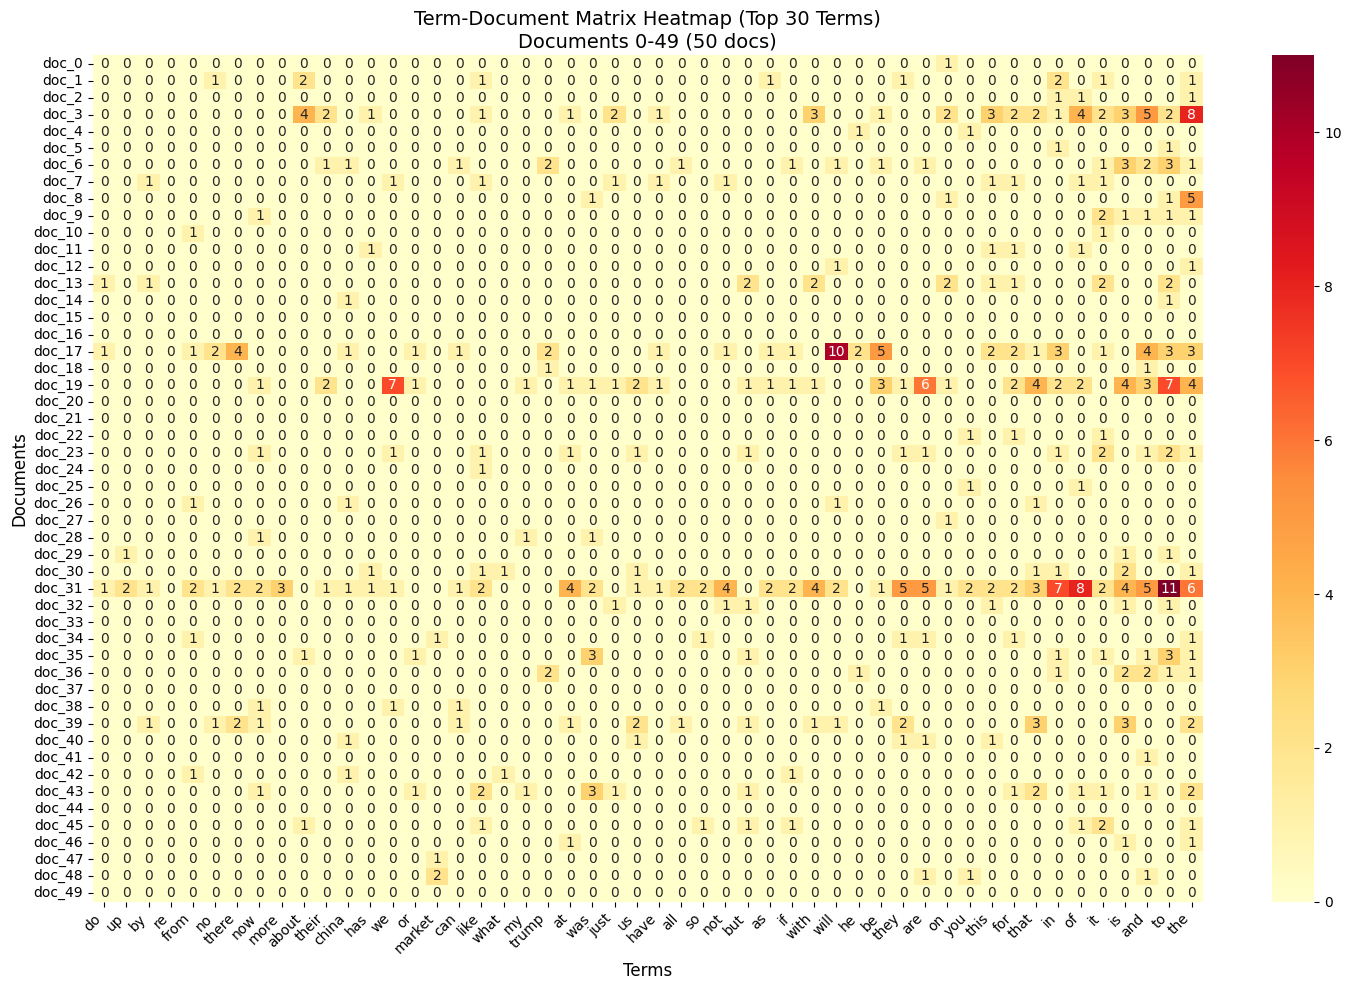

There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


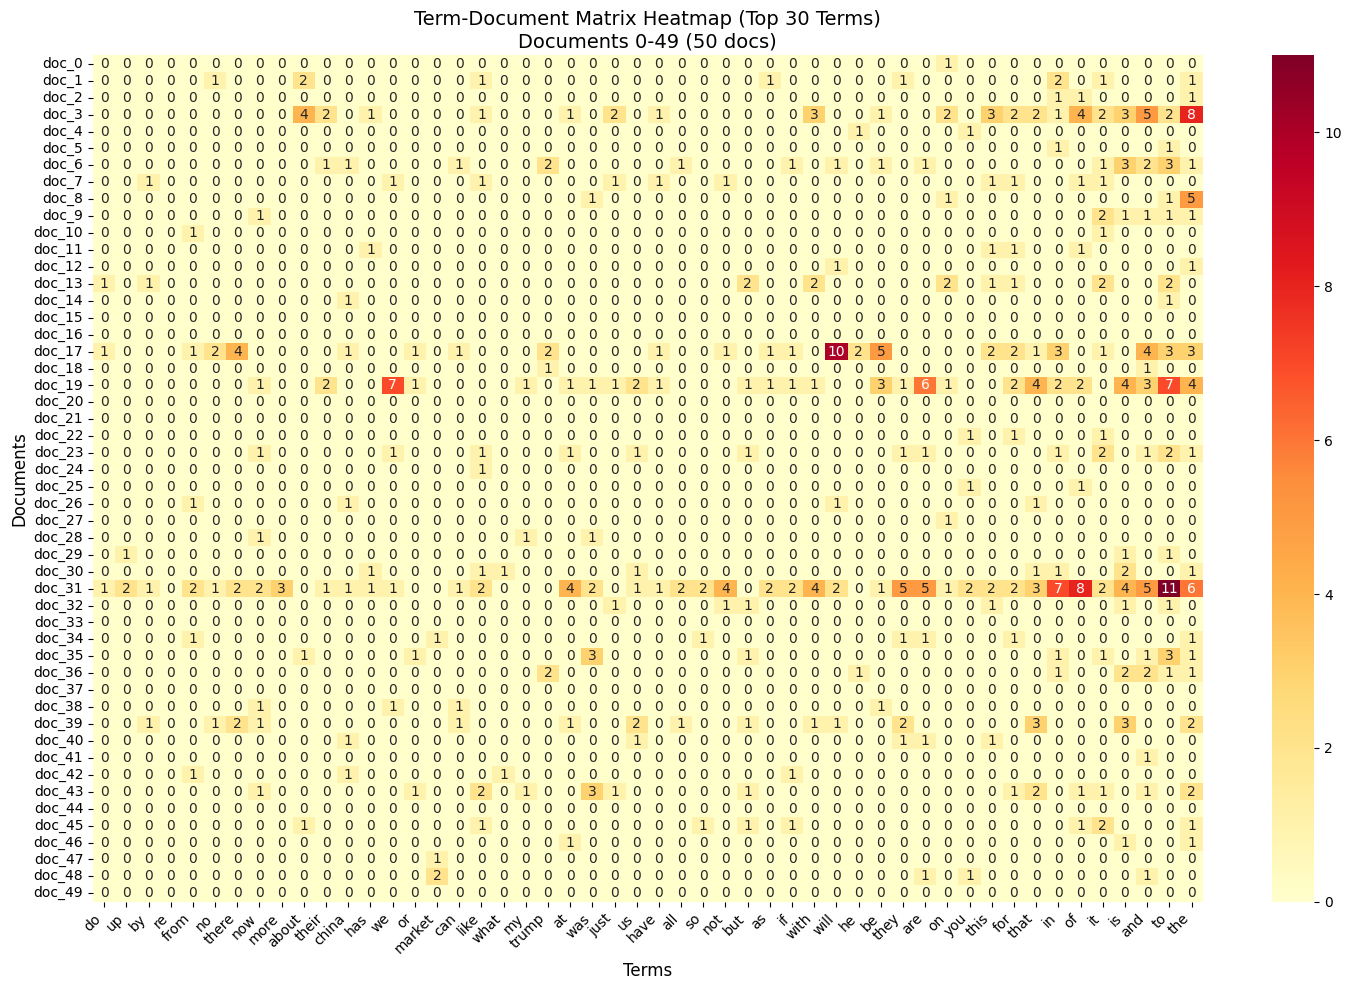

Plot 2: Documents 50 to 99 (Total 50 docs)


There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


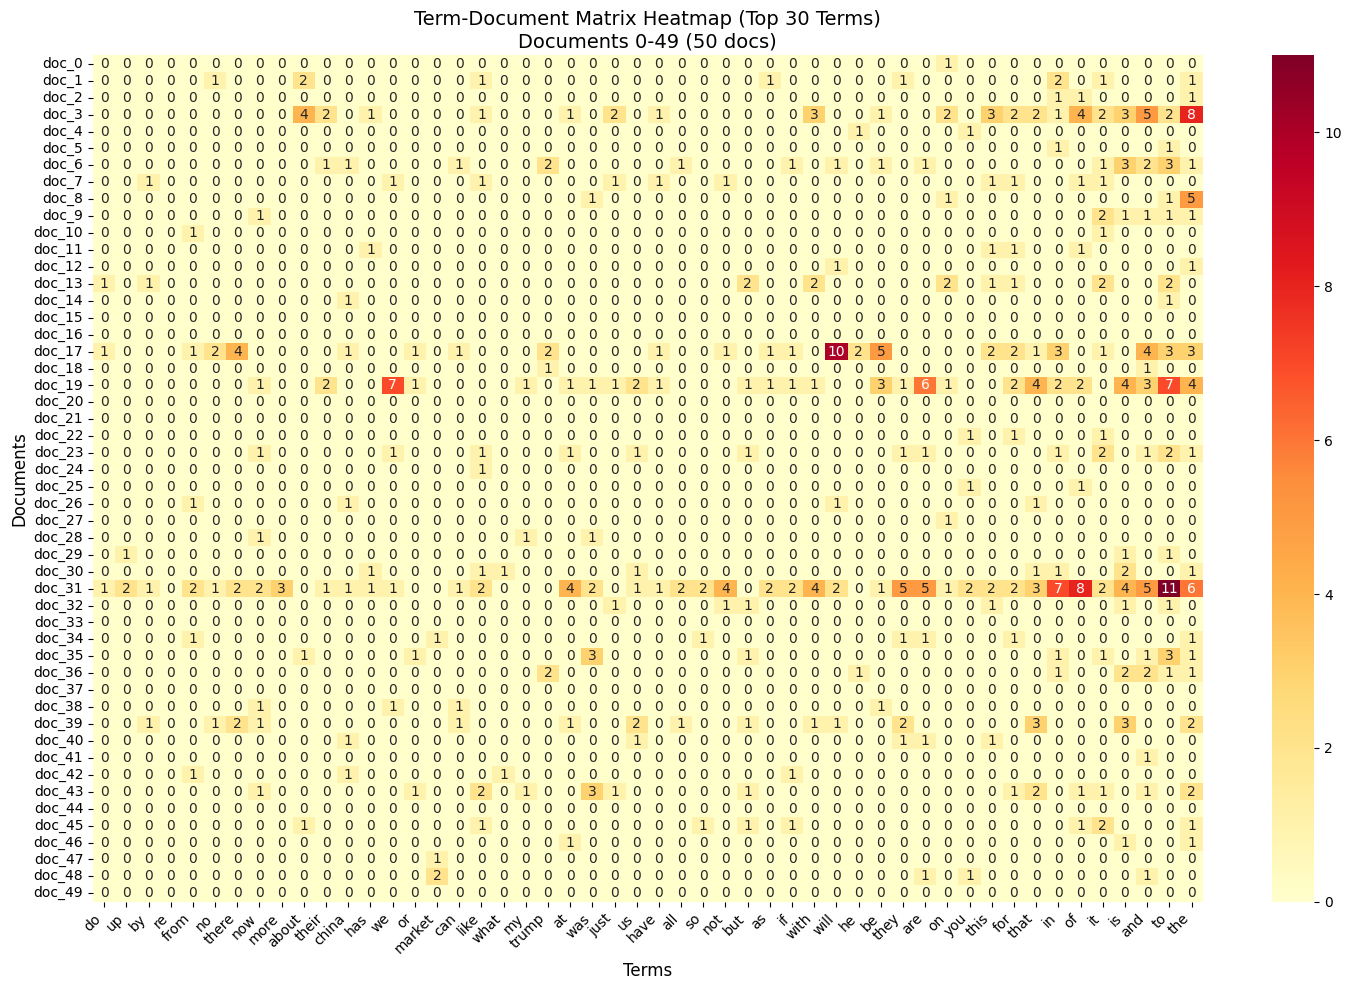

Plot 2: Documents 50 to 99 (Total 50 docs)


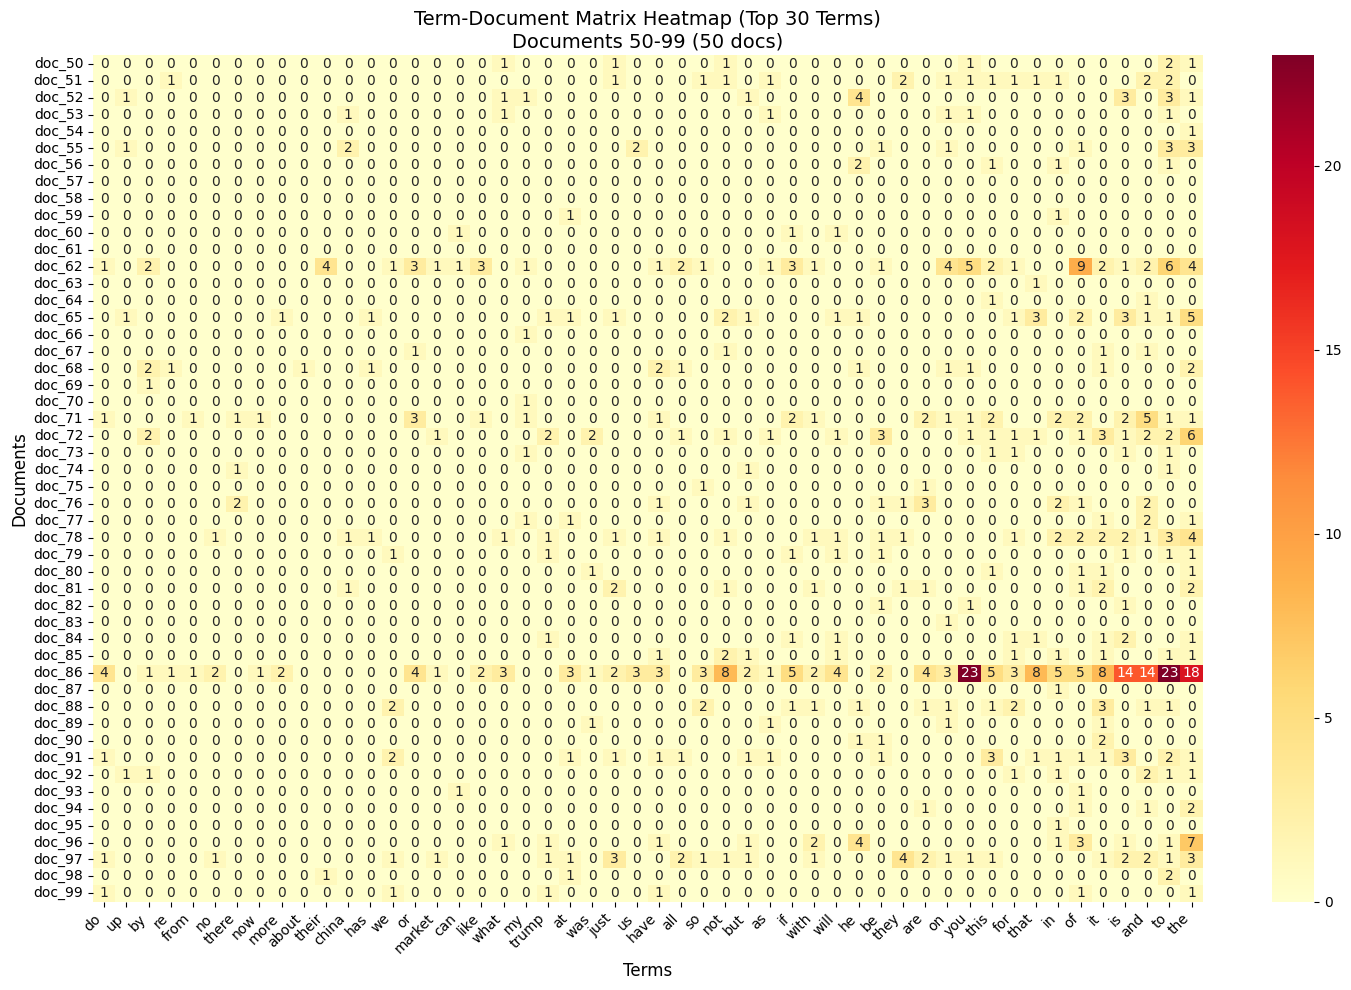

There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


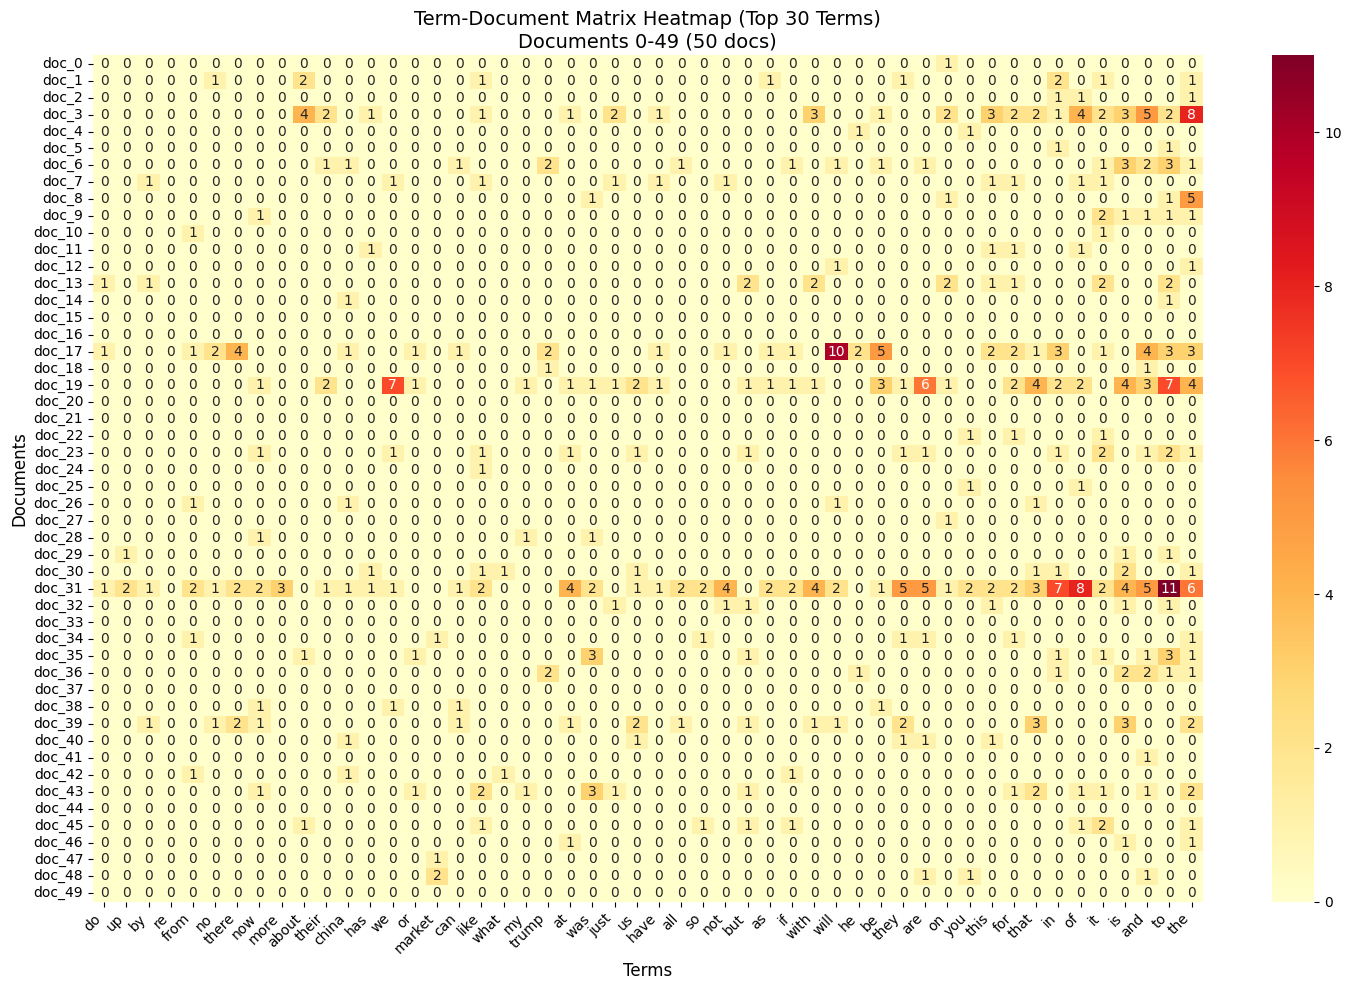

Plot 2: Documents 50 to 99 (Total 50 docs)


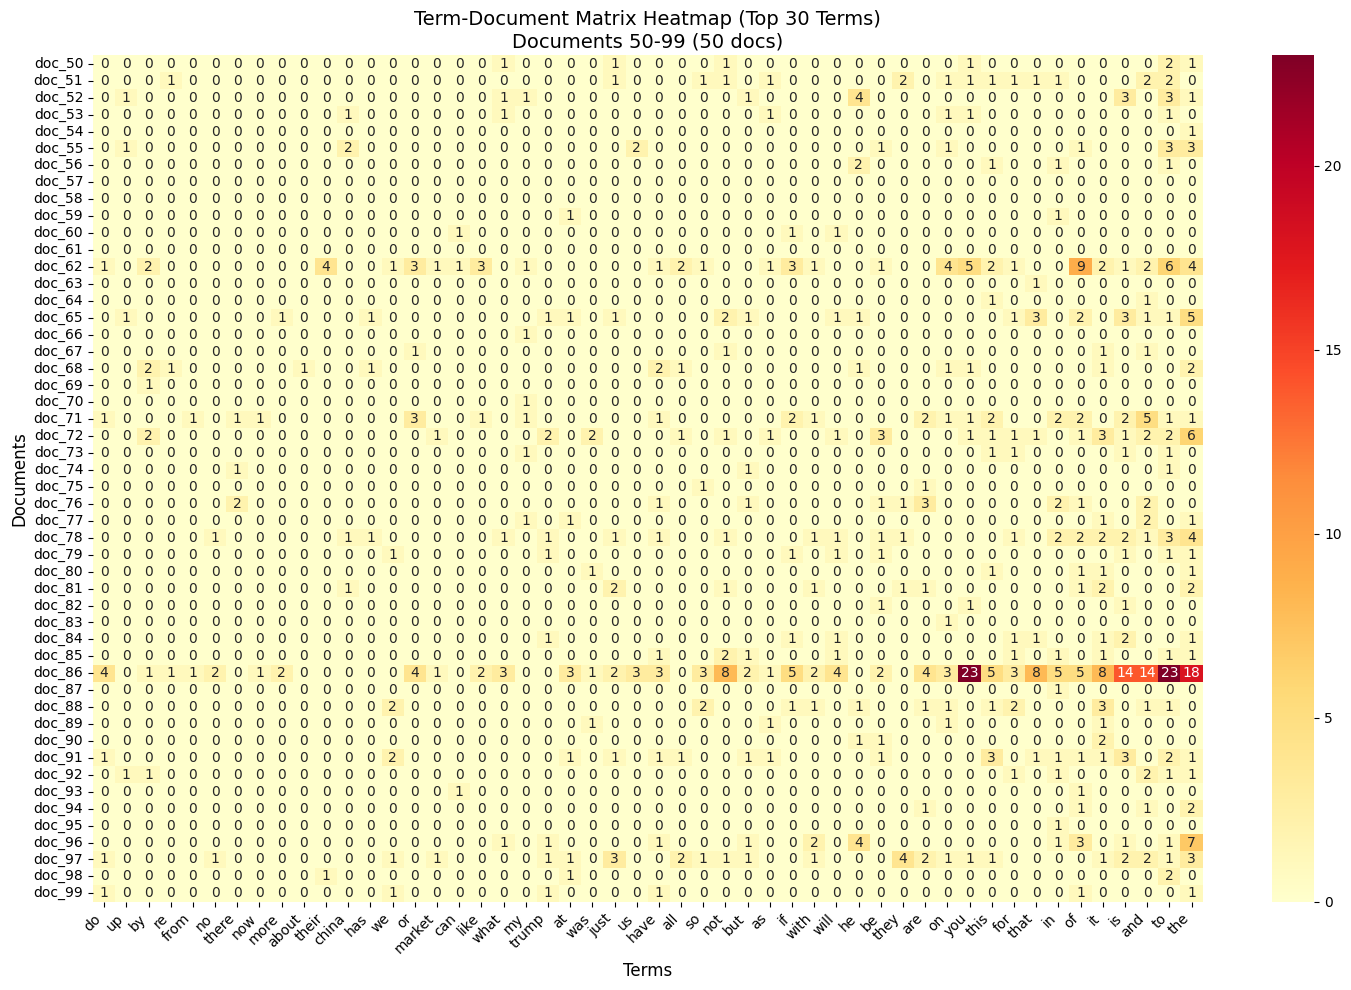

Plot 3: Documents 100 to 149 (Total 50 docs)


There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


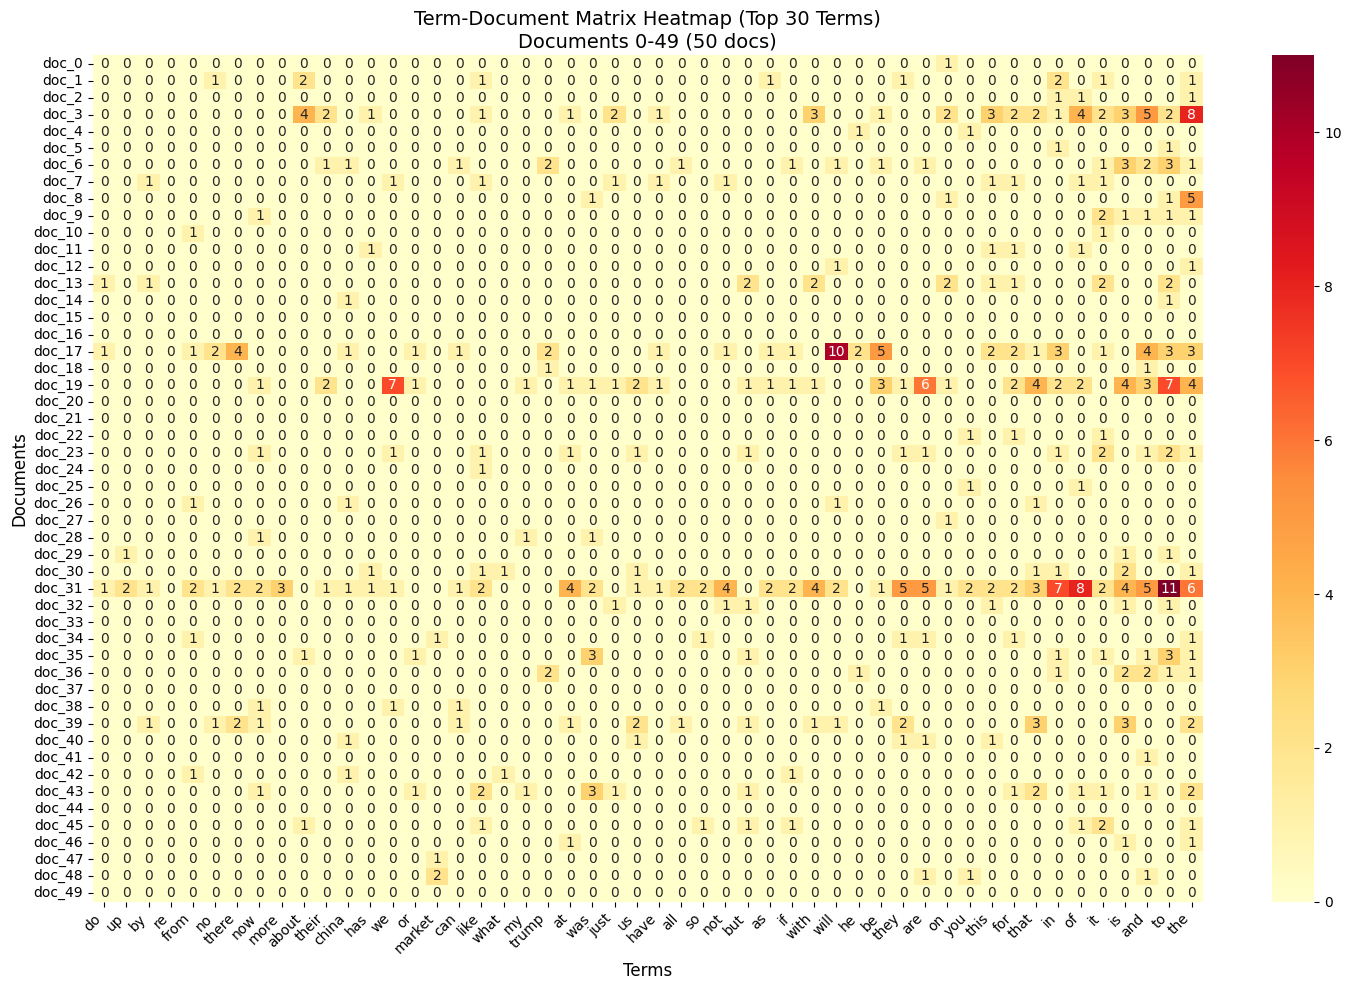

Plot 2: Documents 50 to 99 (Total 50 docs)


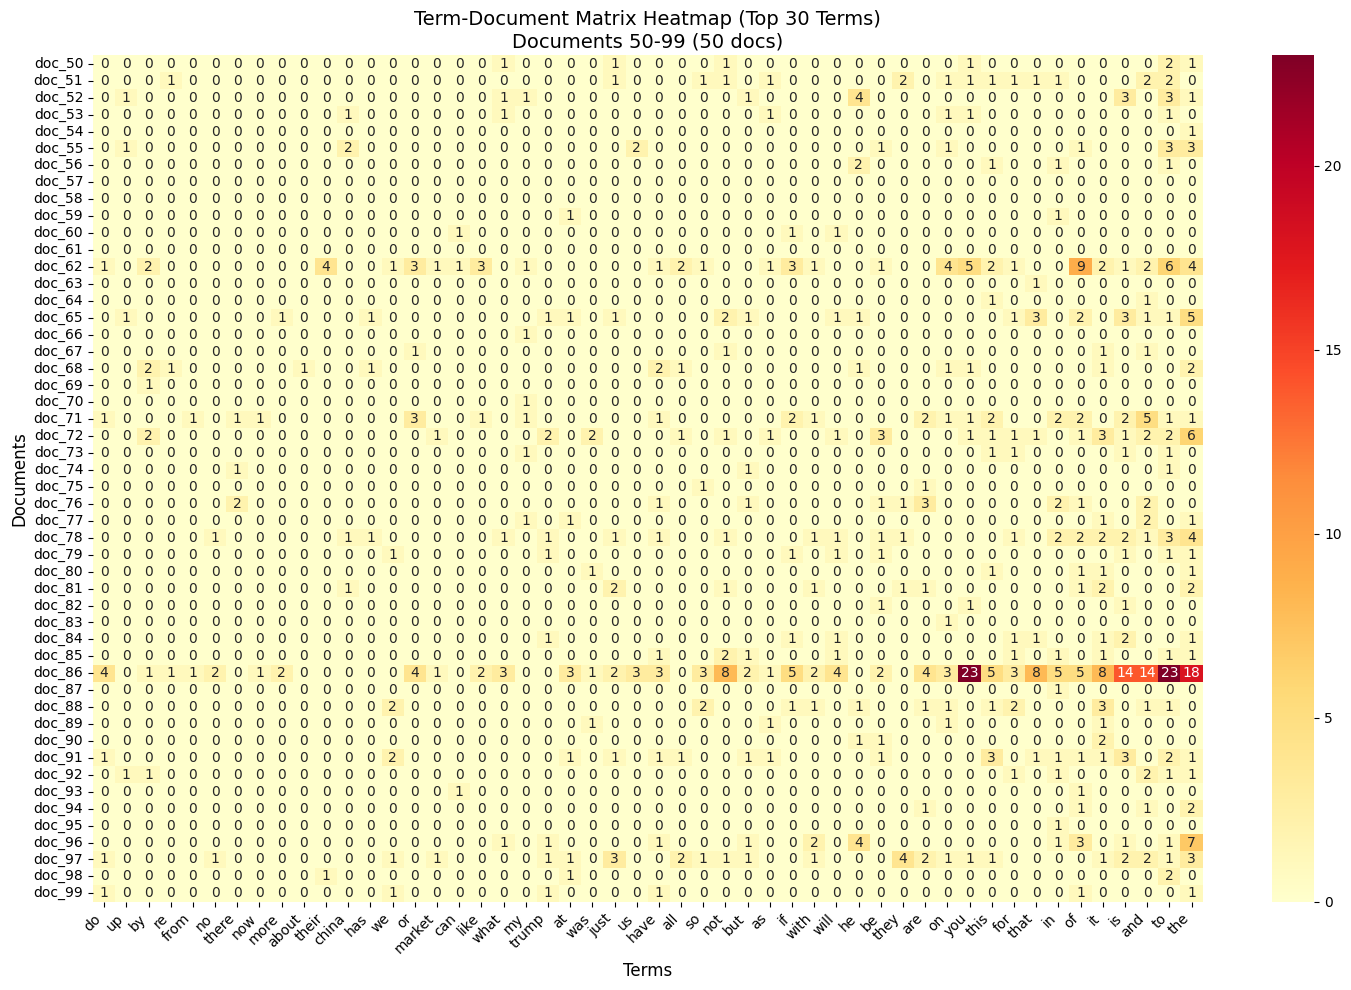

Plot 3: Documents 100 to 149 (Total 50 docs)


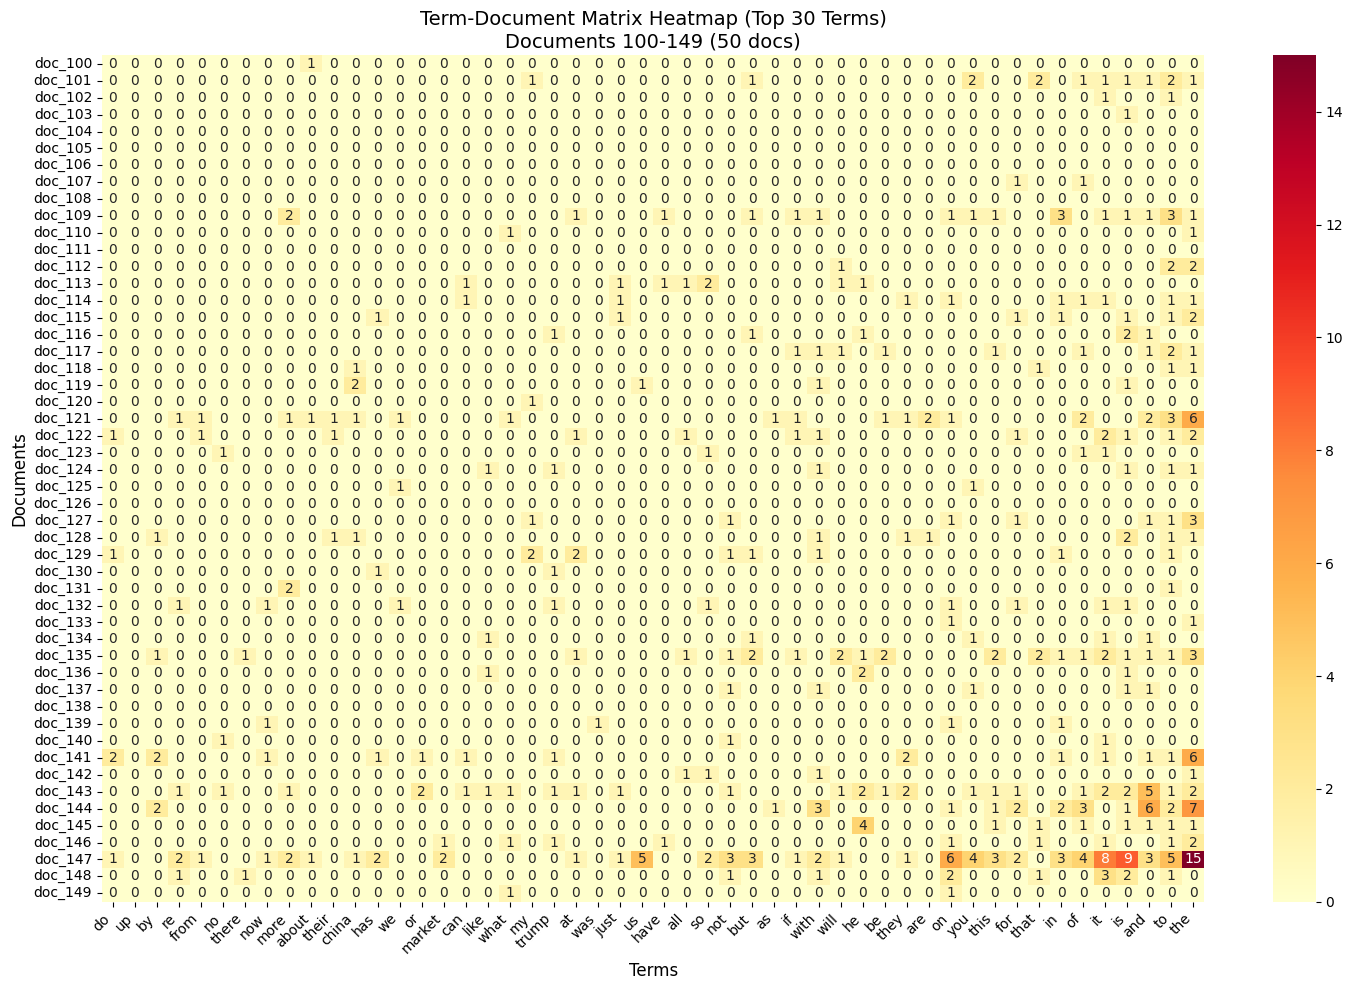

There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


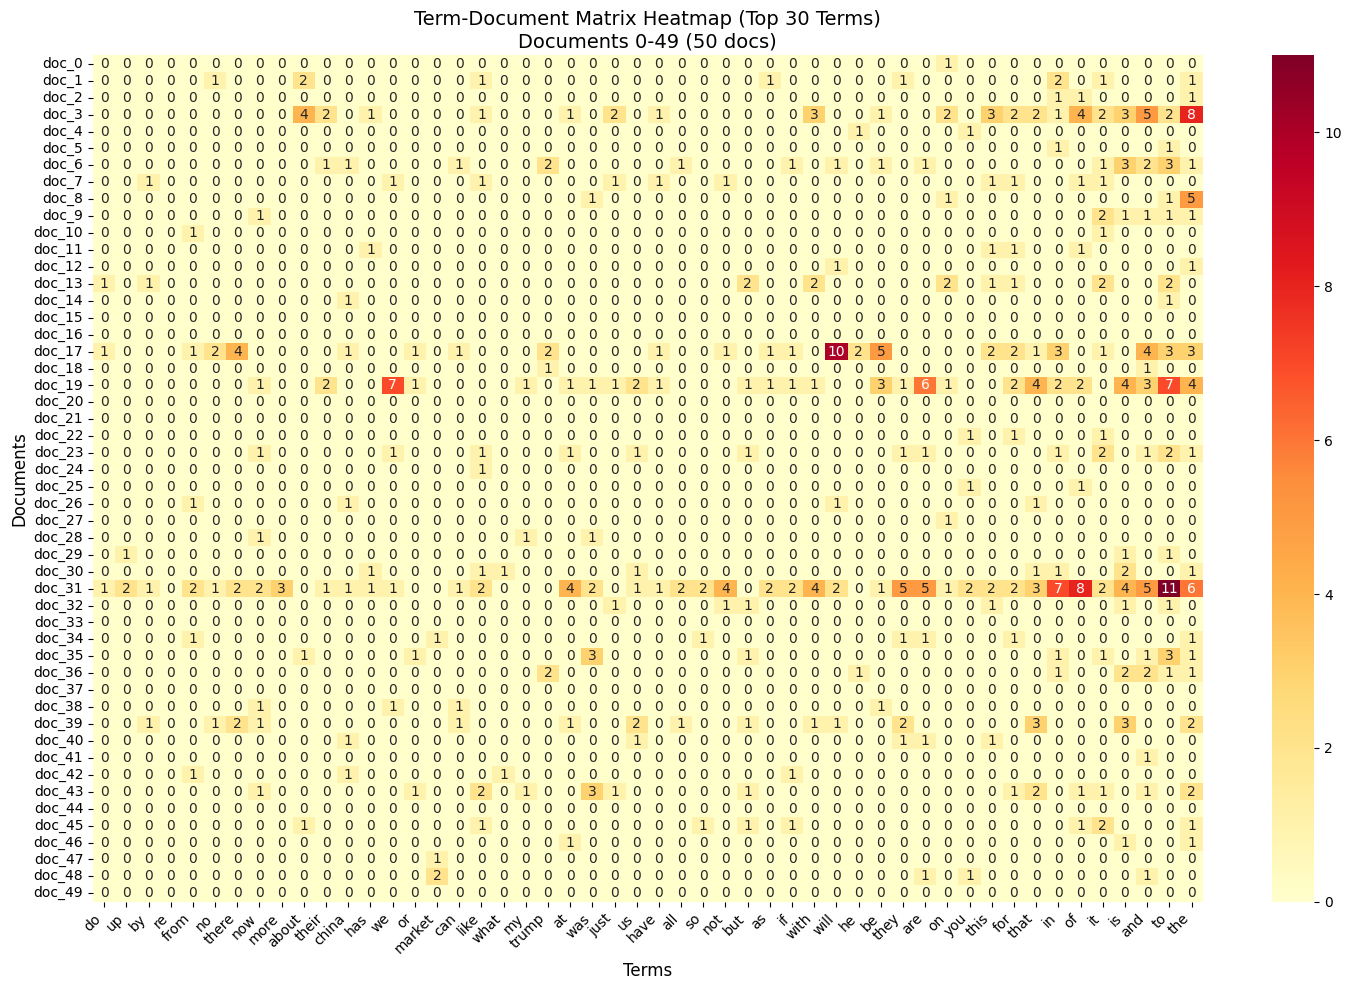

Plot 2: Documents 50 to 99 (Total 50 docs)


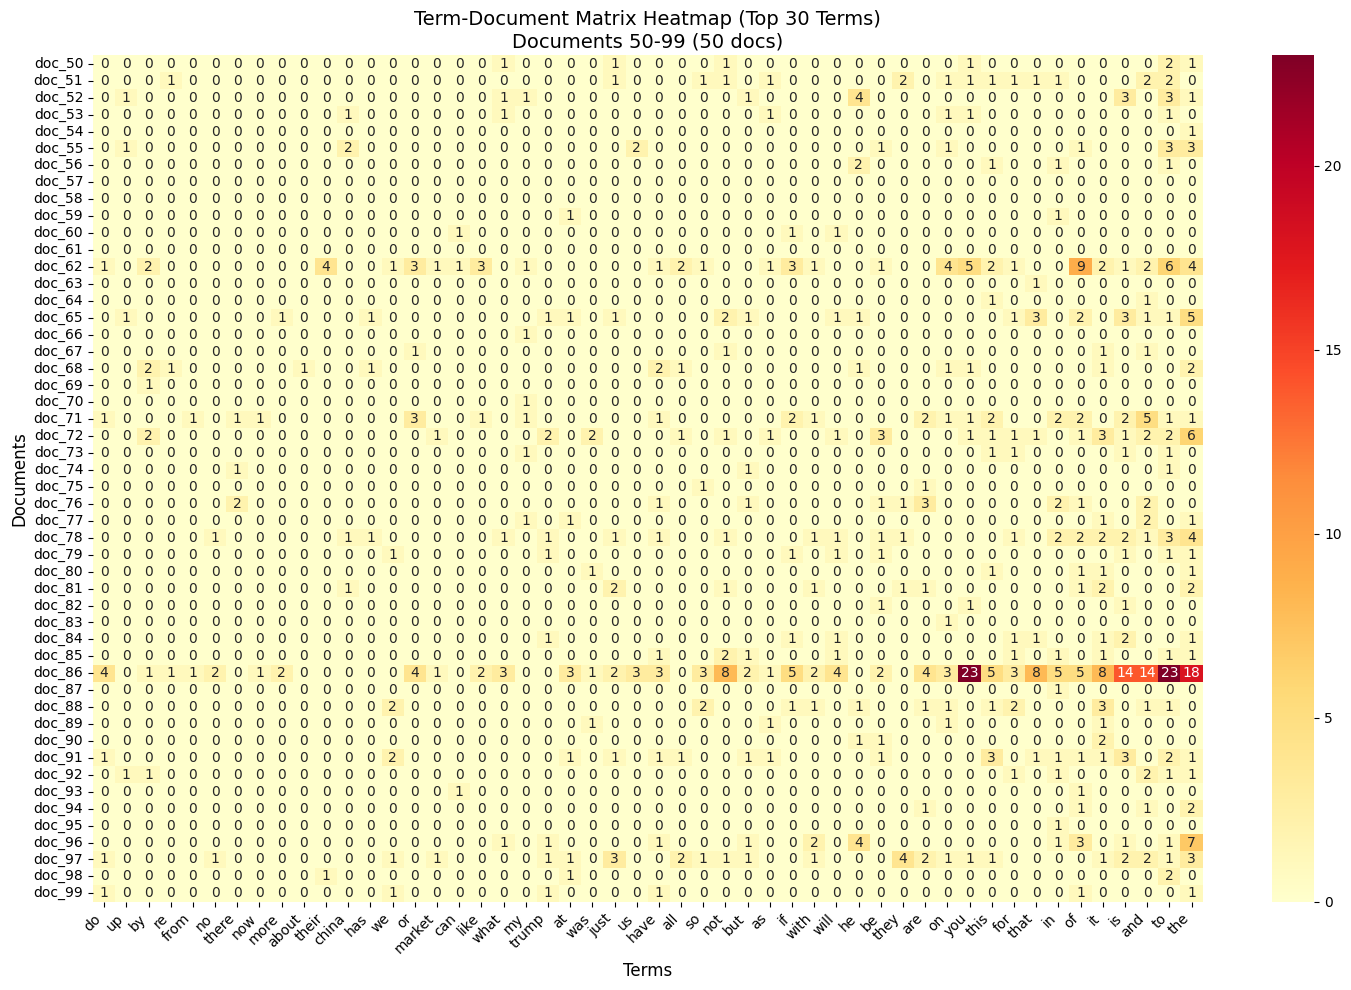

Plot 3: Documents 100 to 149 (Total 50 docs)


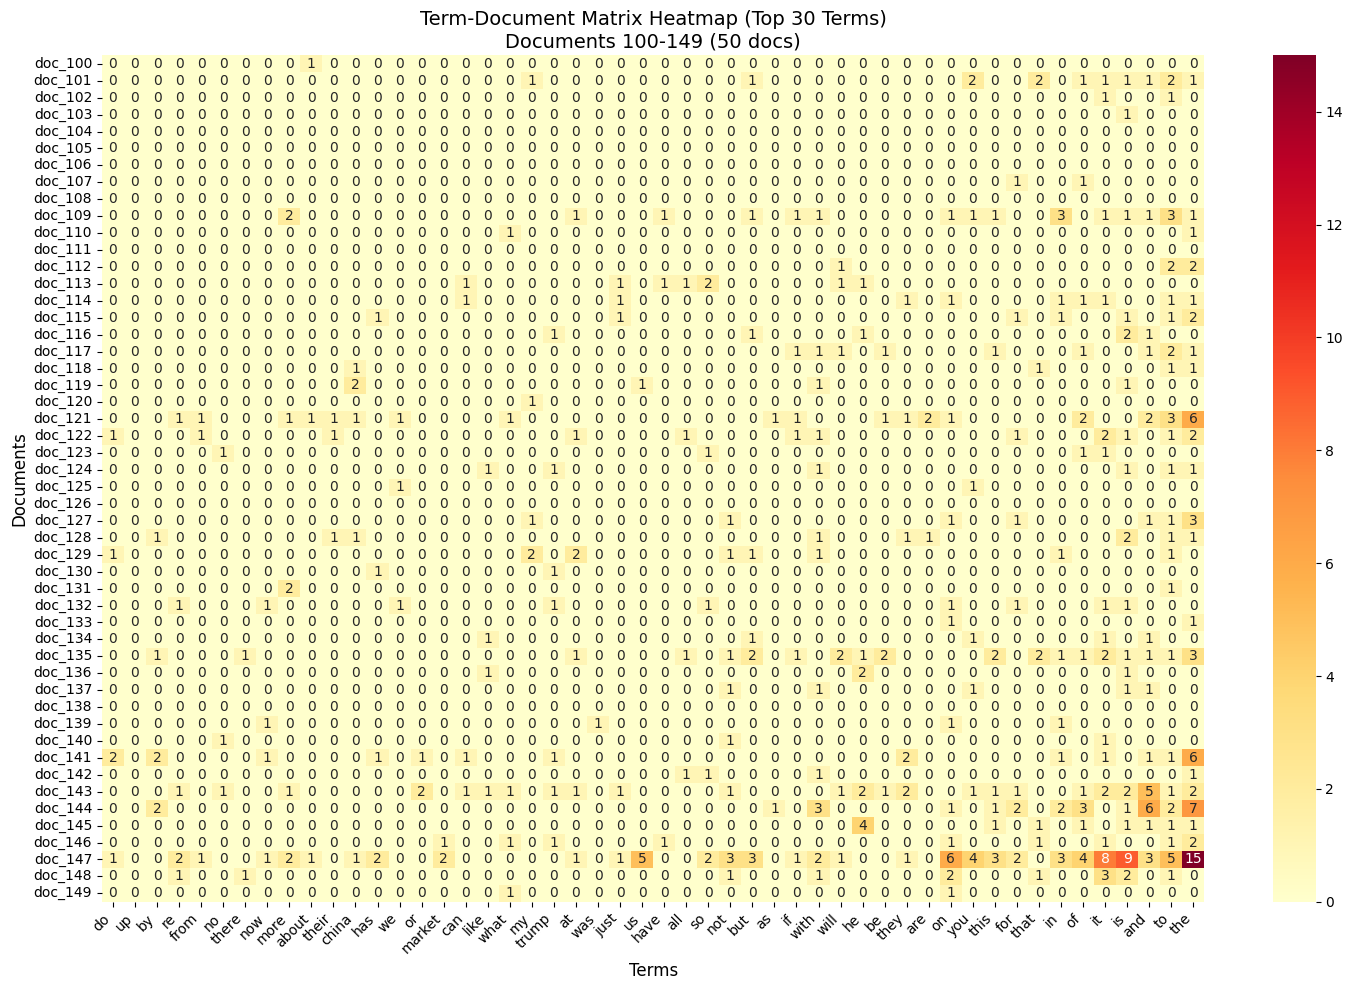

Plot 4: Documents 150 to 199 (Total 50 docs)


There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


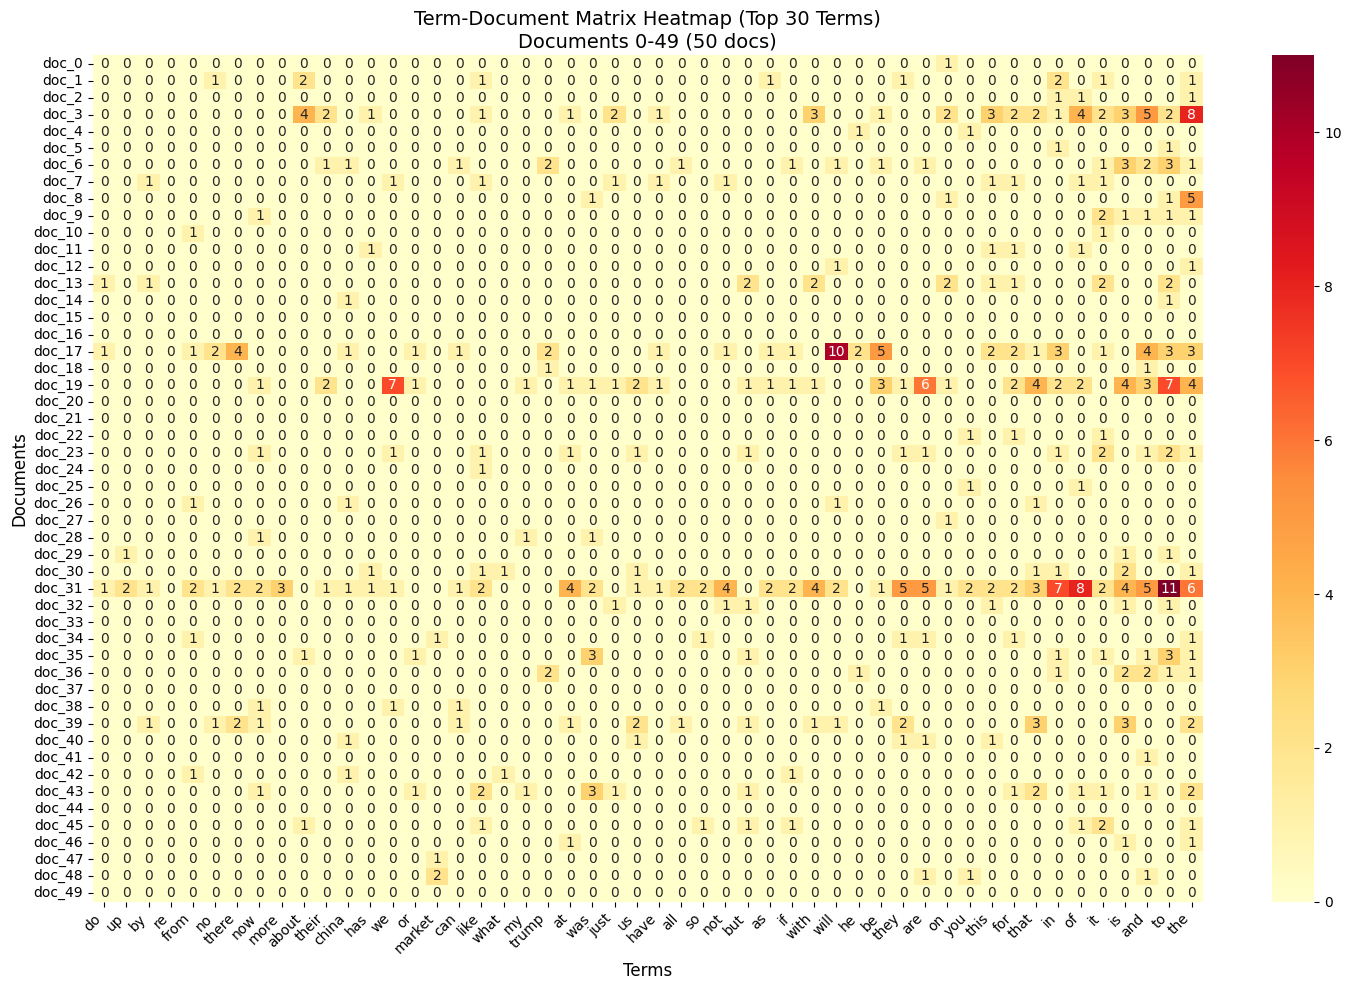

Plot 2: Documents 50 to 99 (Total 50 docs)


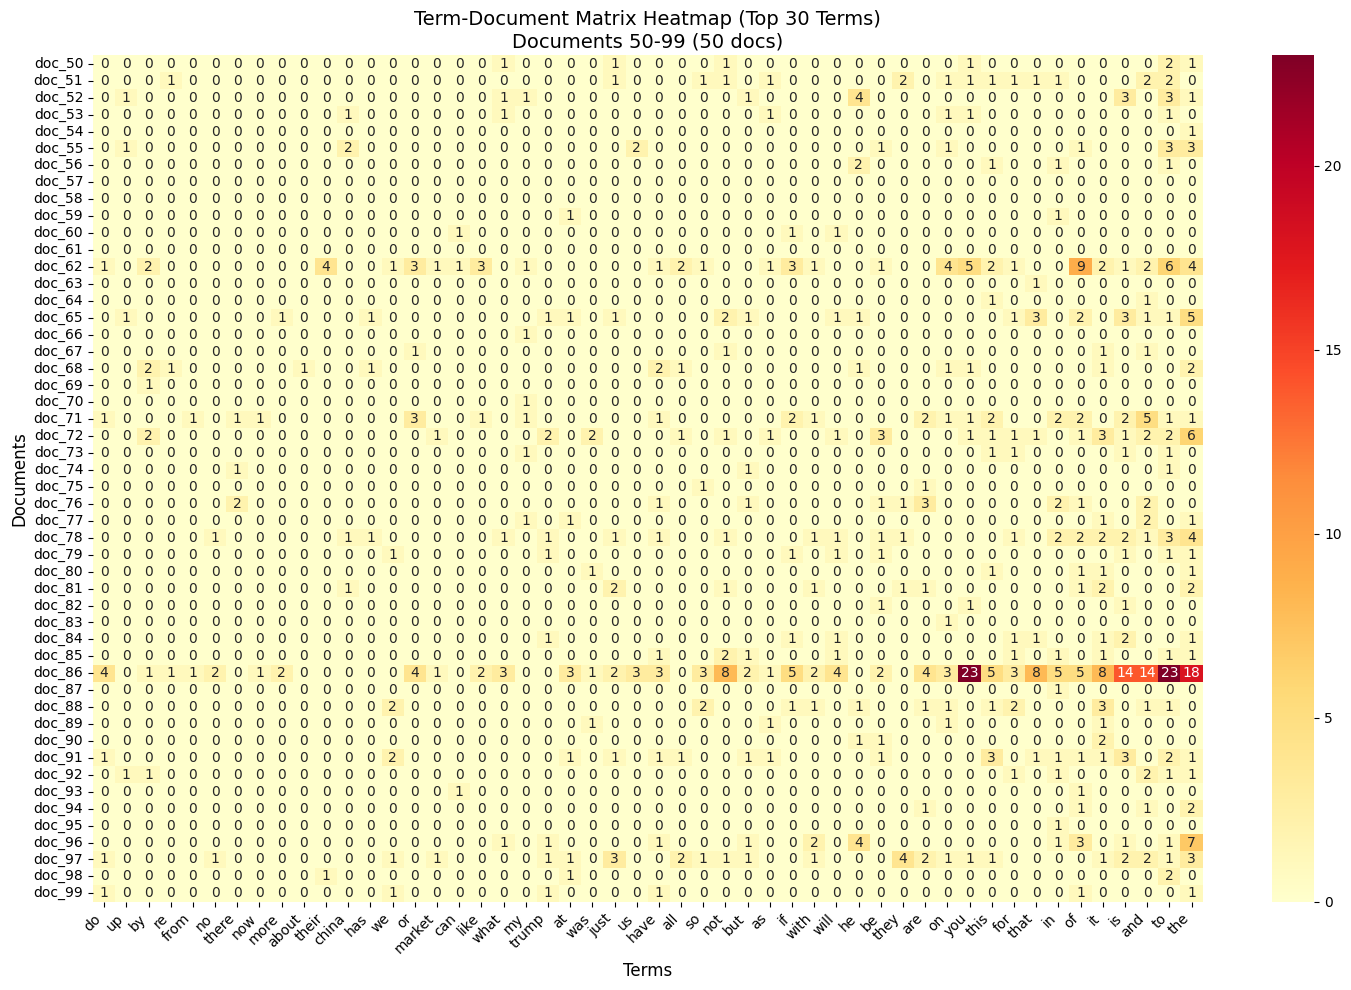

Plot 3: Documents 100 to 149 (Total 50 docs)


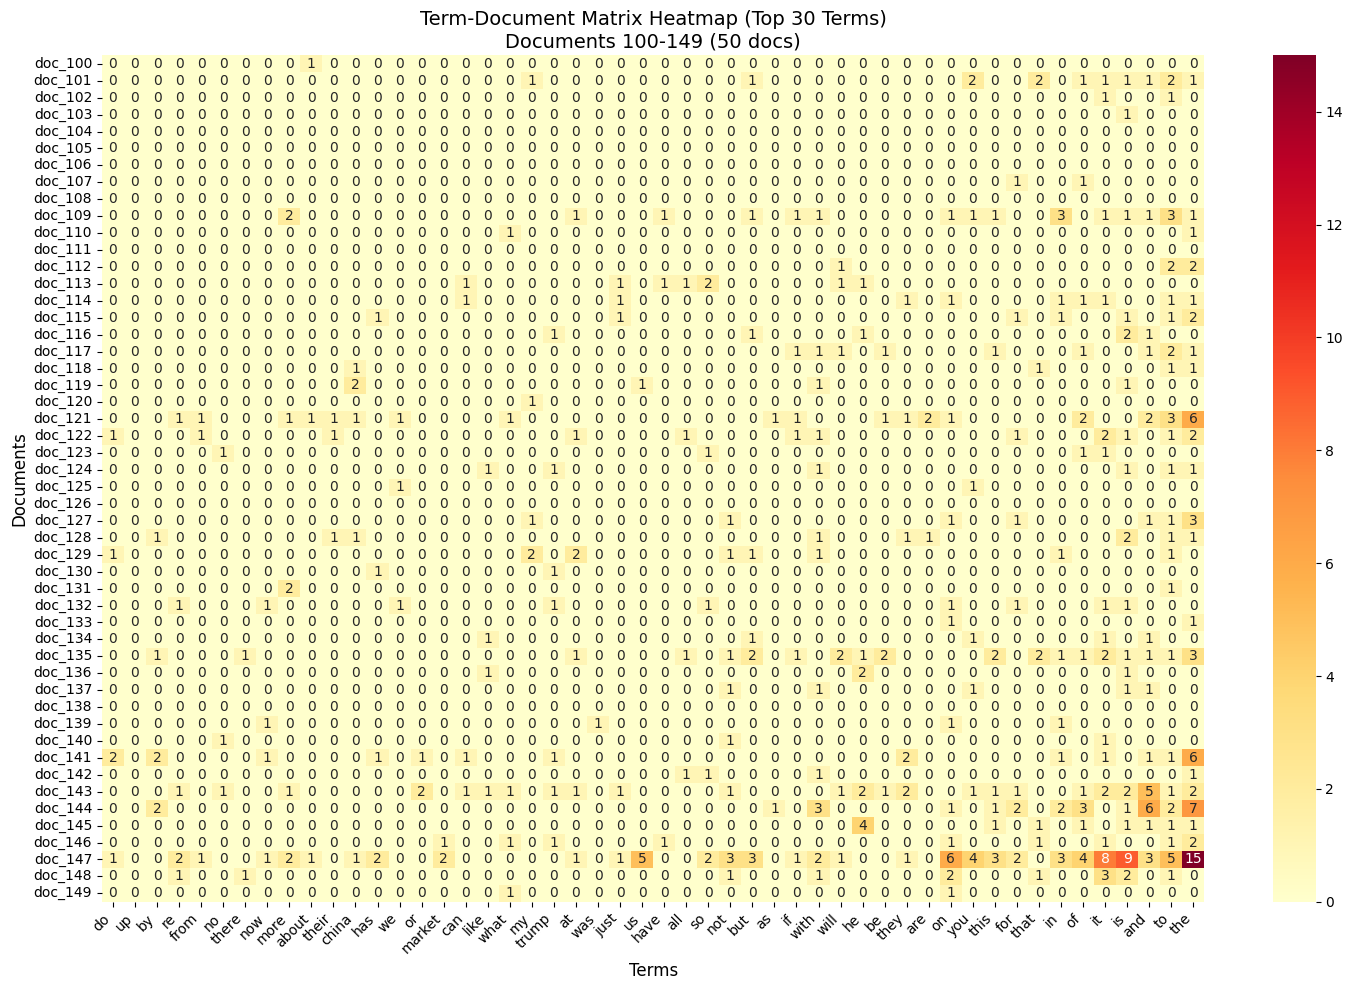

Plot 4: Documents 150 to 199 (Total 50 docs)


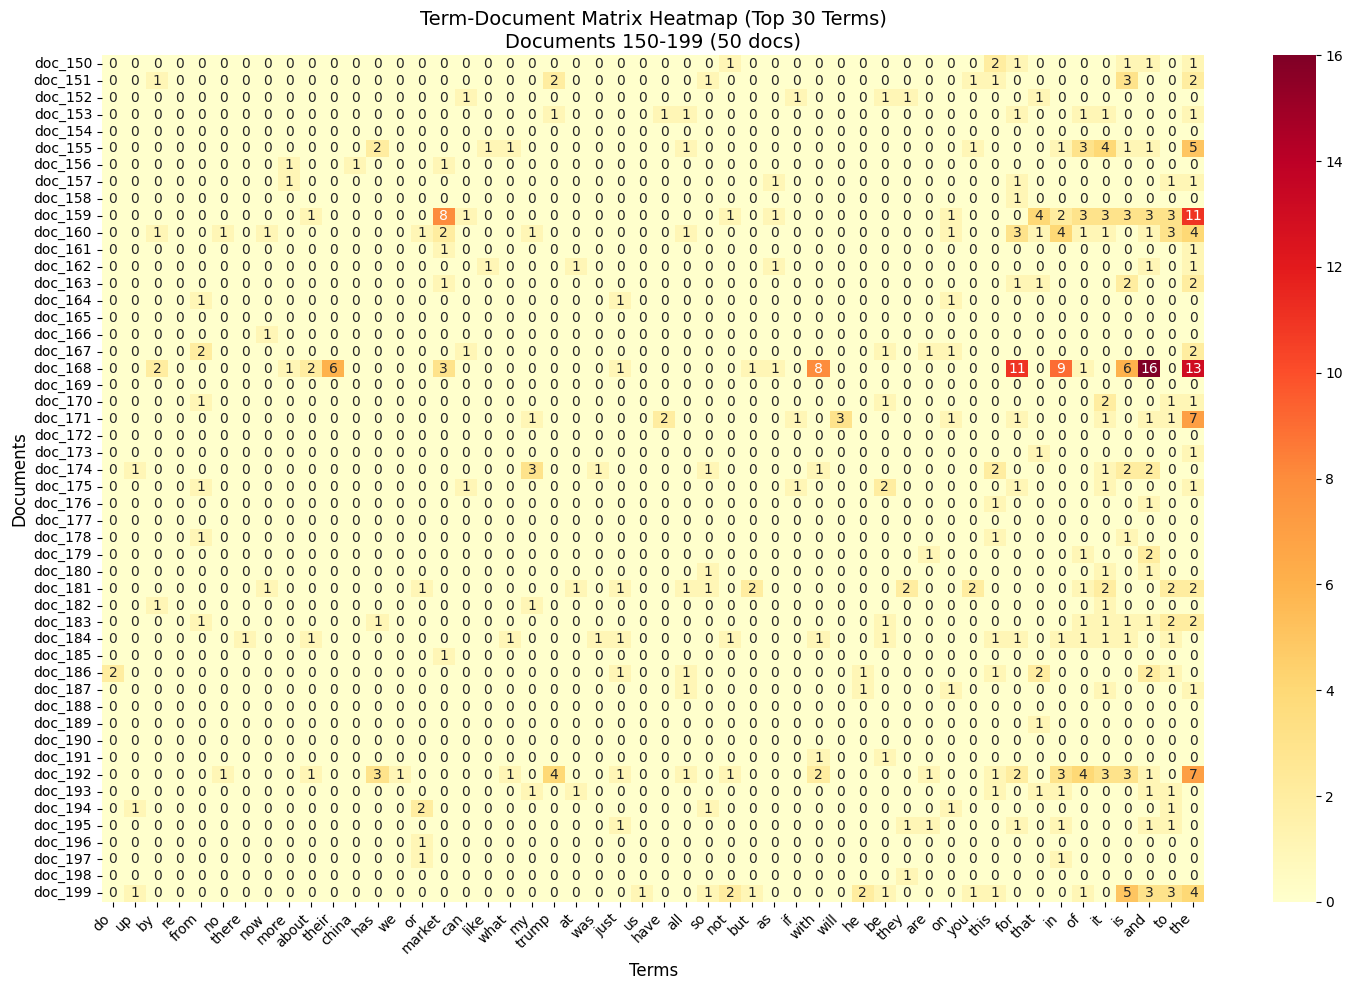

There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


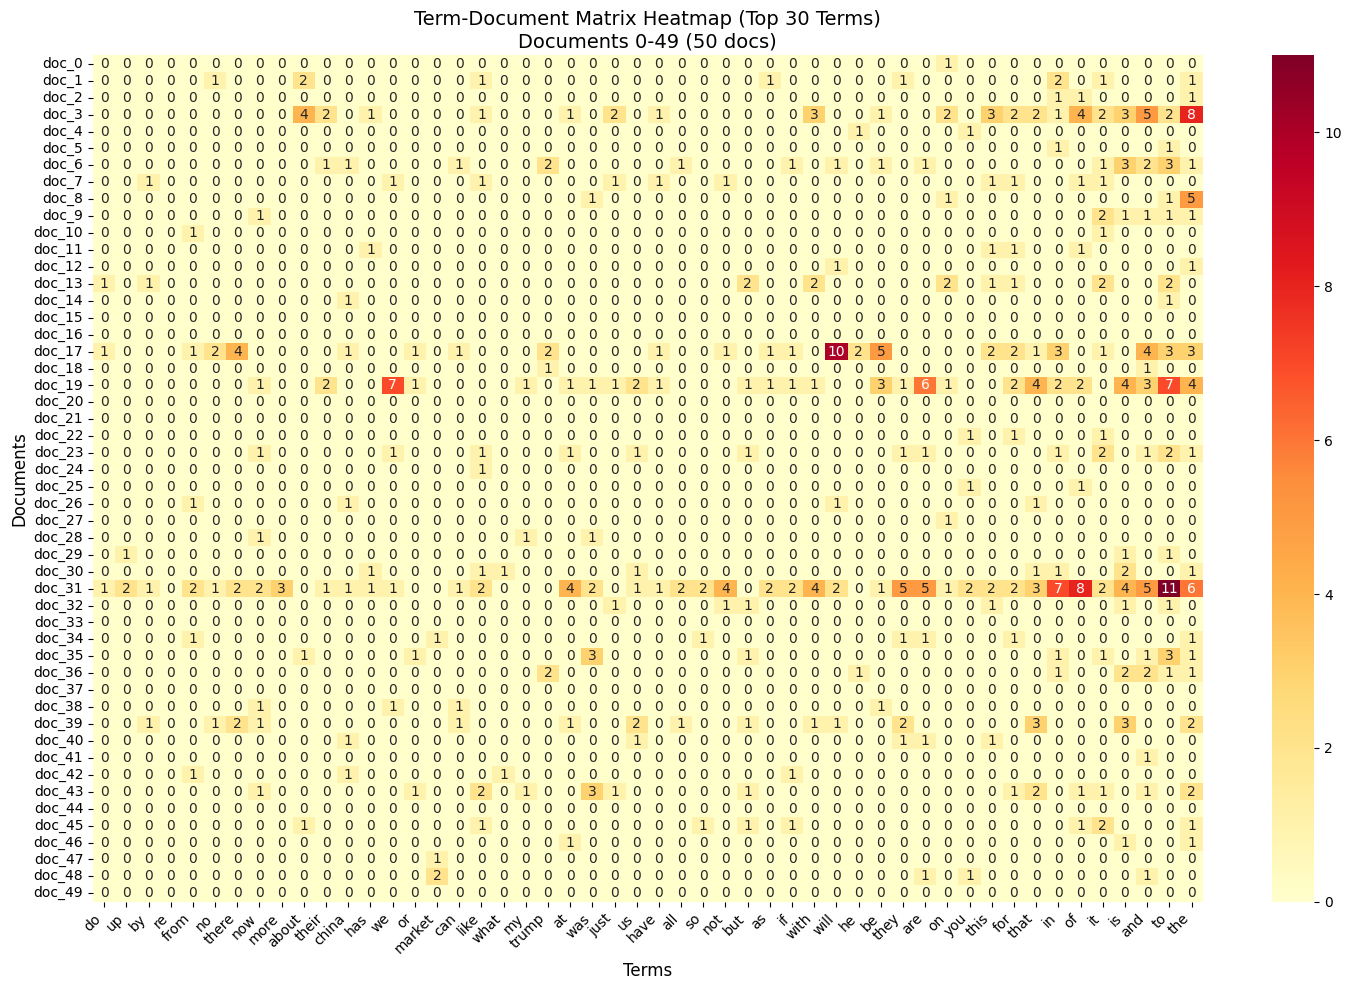

Plot 2: Documents 50 to 99 (Total 50 docs)


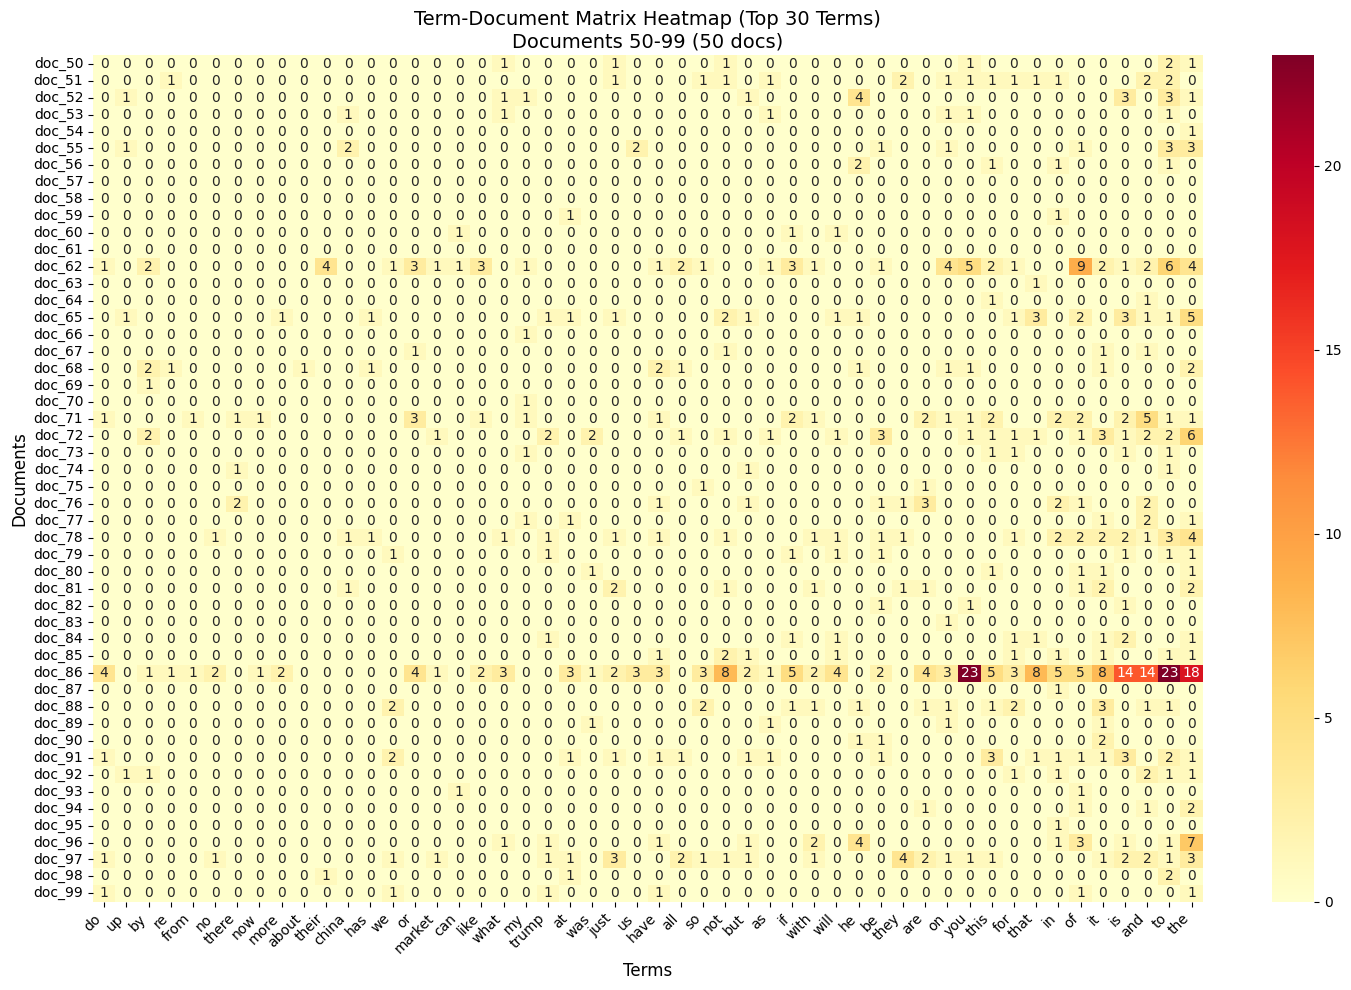

Plot 3: Documents 100 to 149 (Total 50 docs)


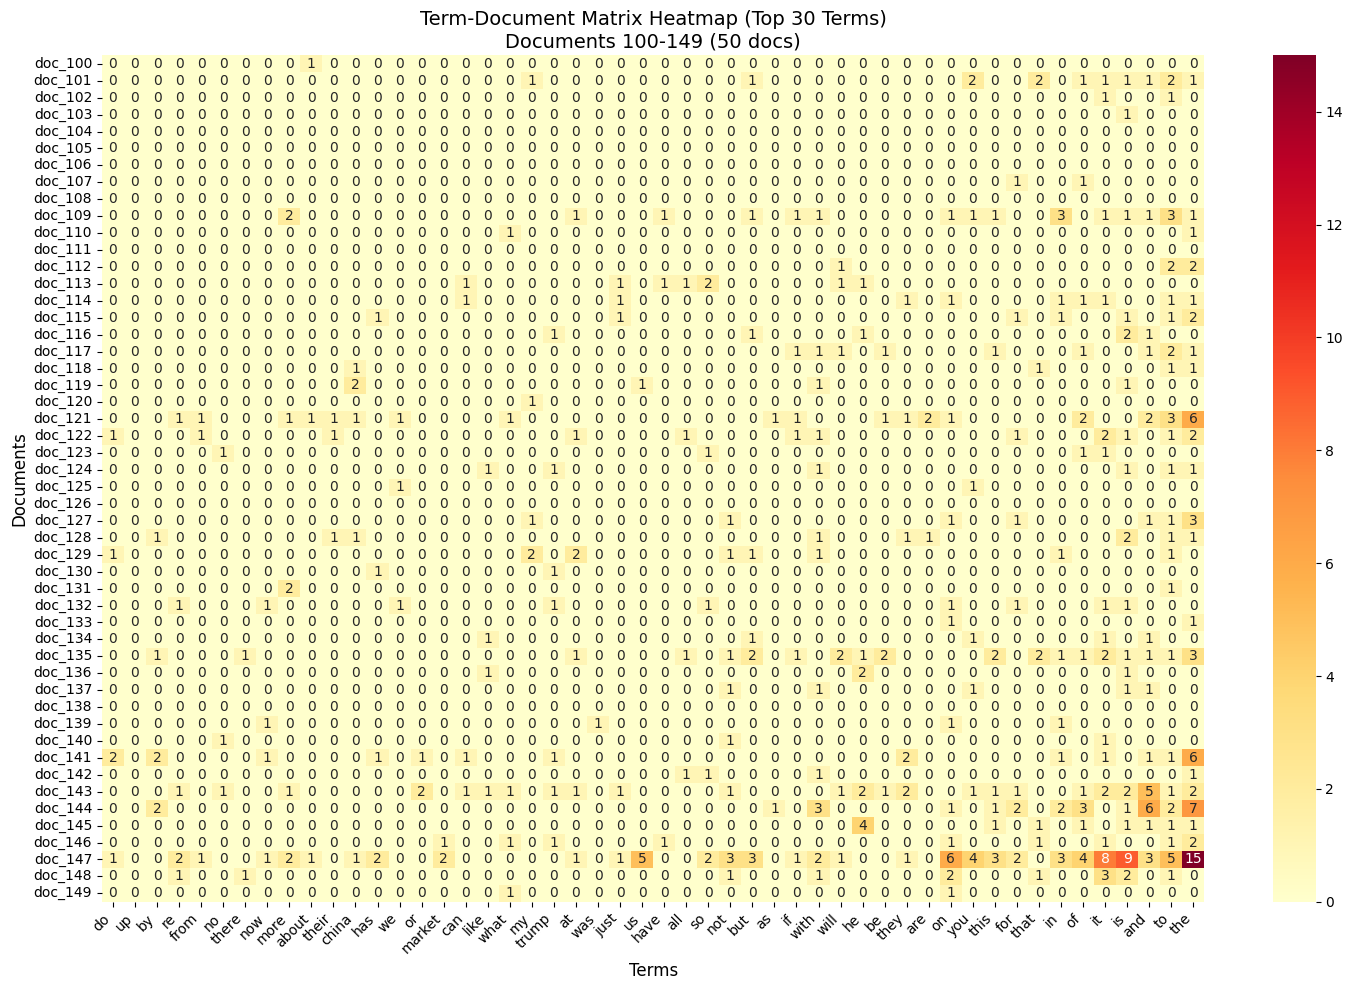

Plot 4: Documents 150 to 199 (Total 50 docs)


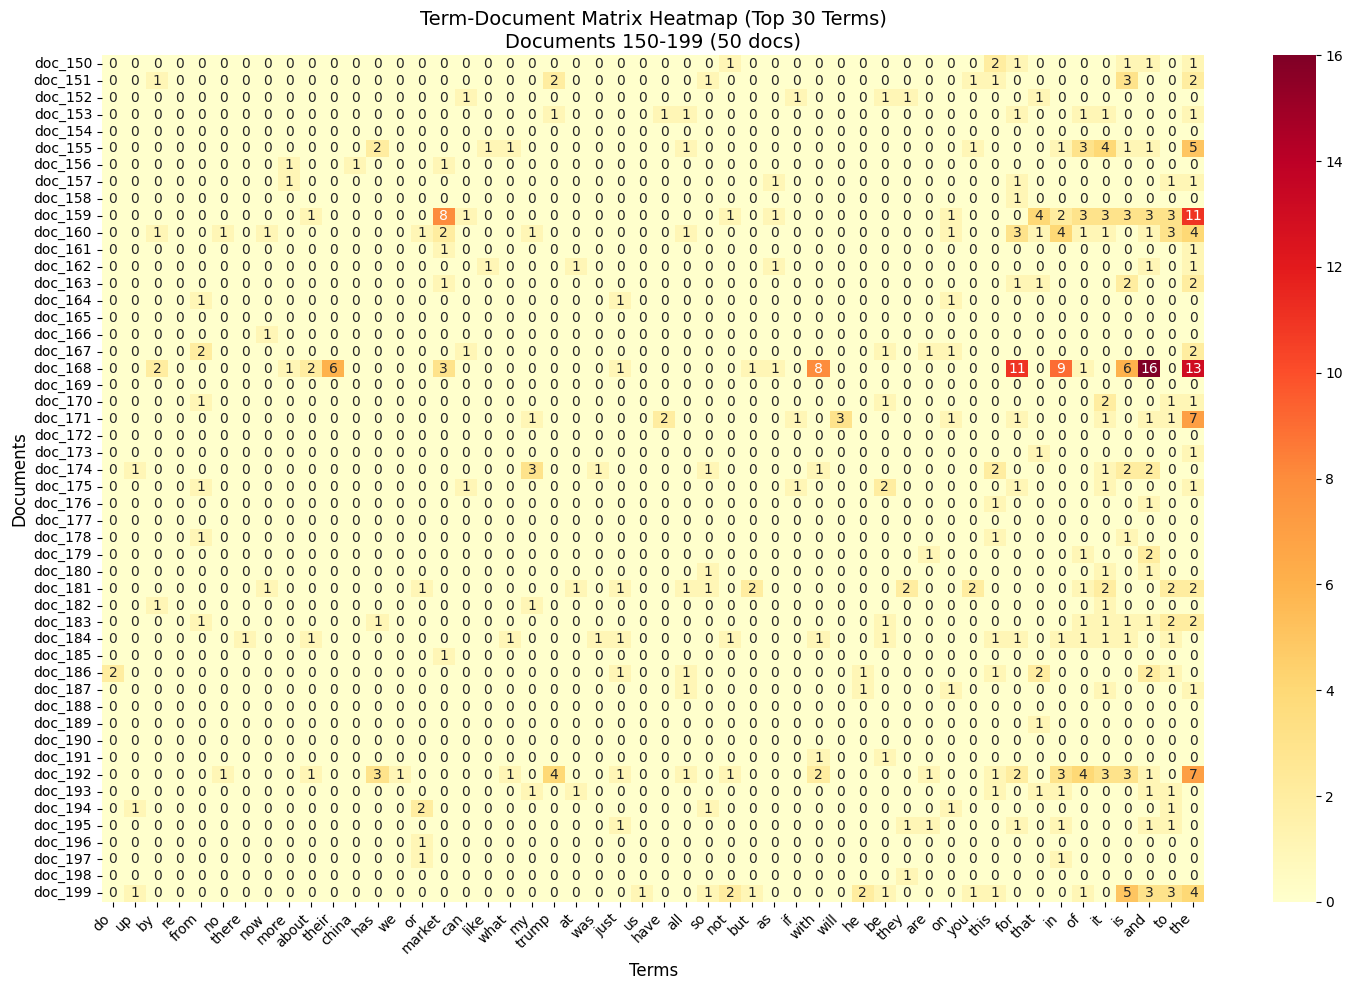

Plot 5: Documents 200 to 249 (Total 50 docs)


There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


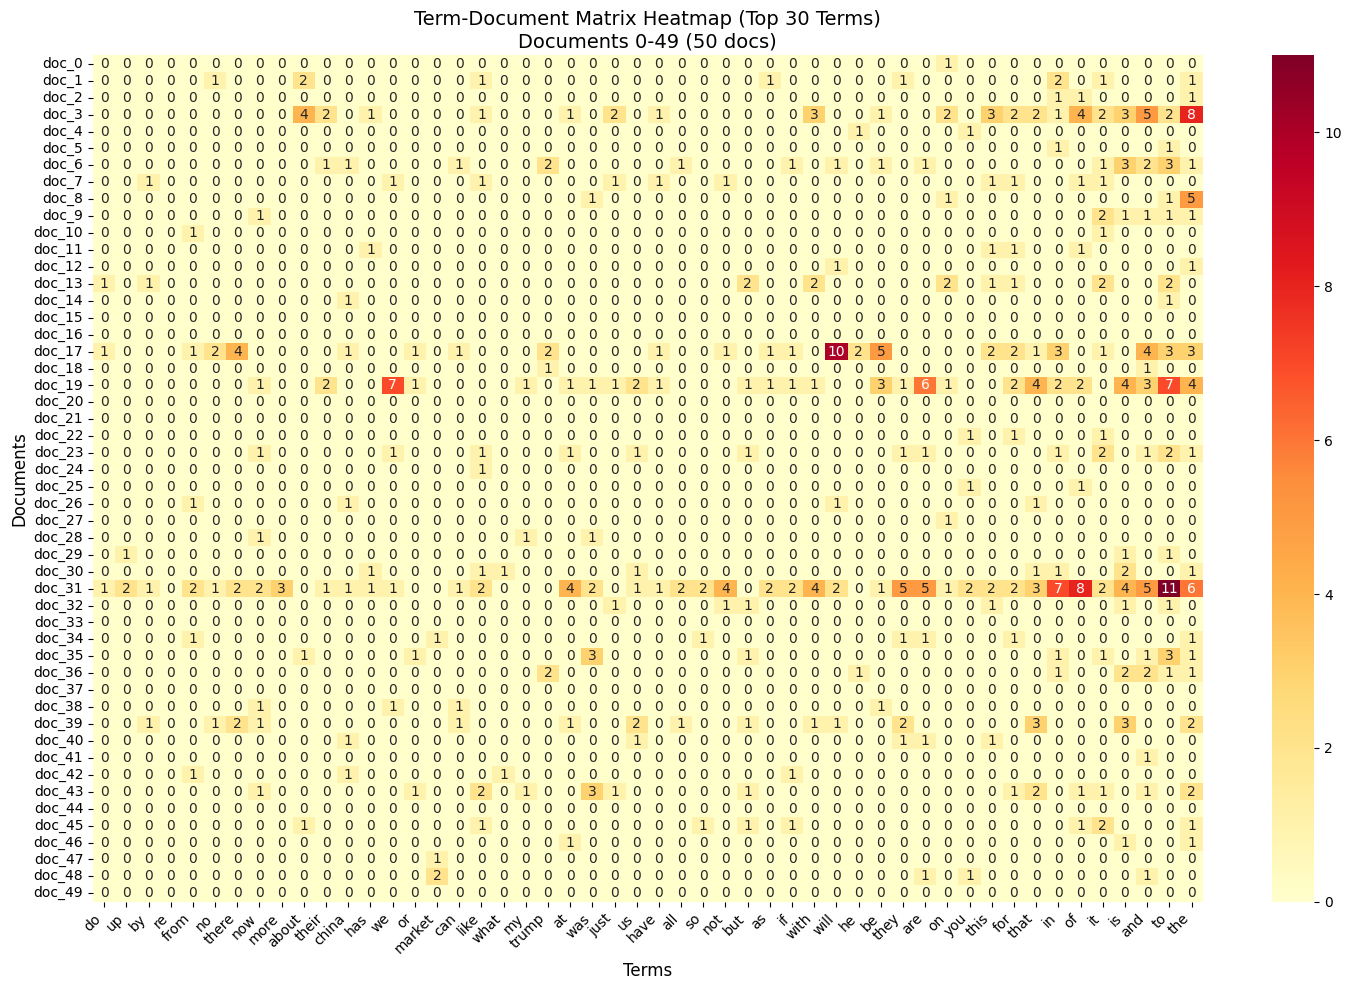

Plot 2: Documents 50 to 99 (Total 50 docs)


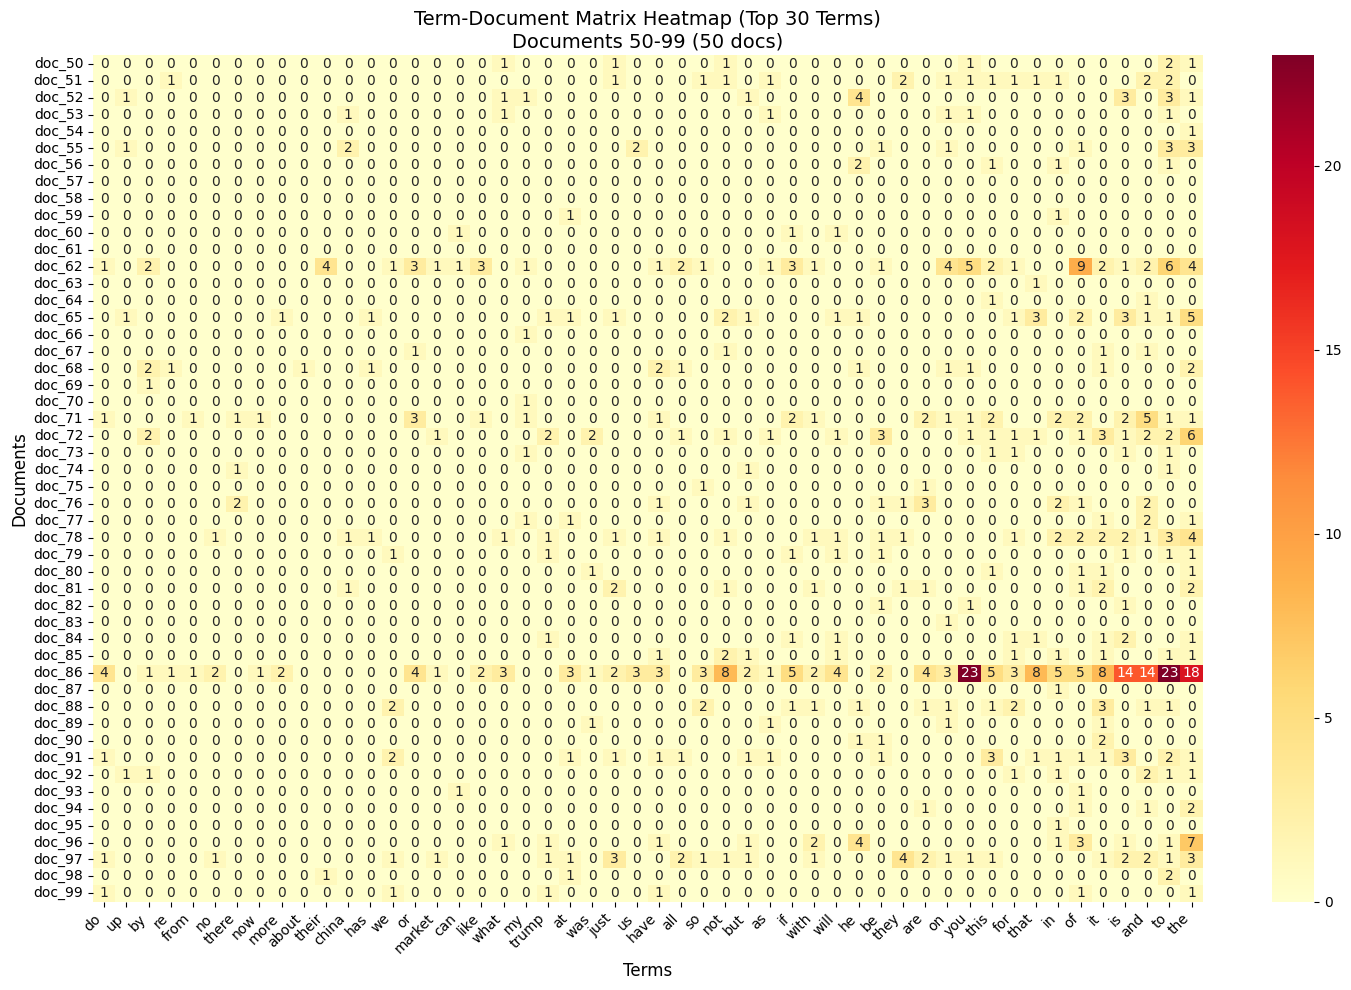

Plot 3: Documents 100 to 149 (Total 50 docs)


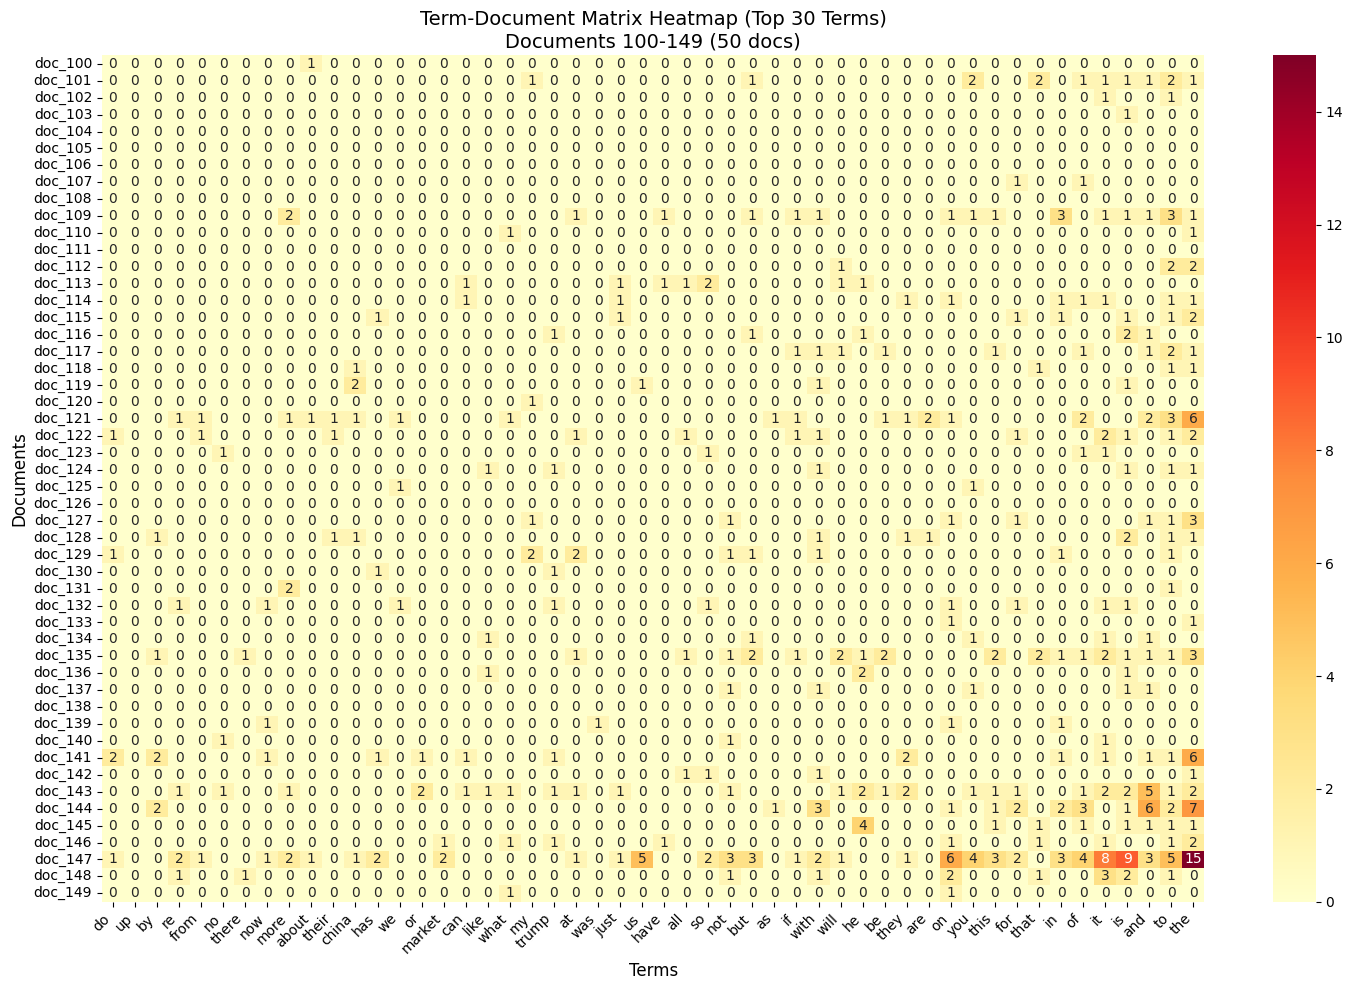

Plot 4: Documents 150 to 199 (Total 50 docs)


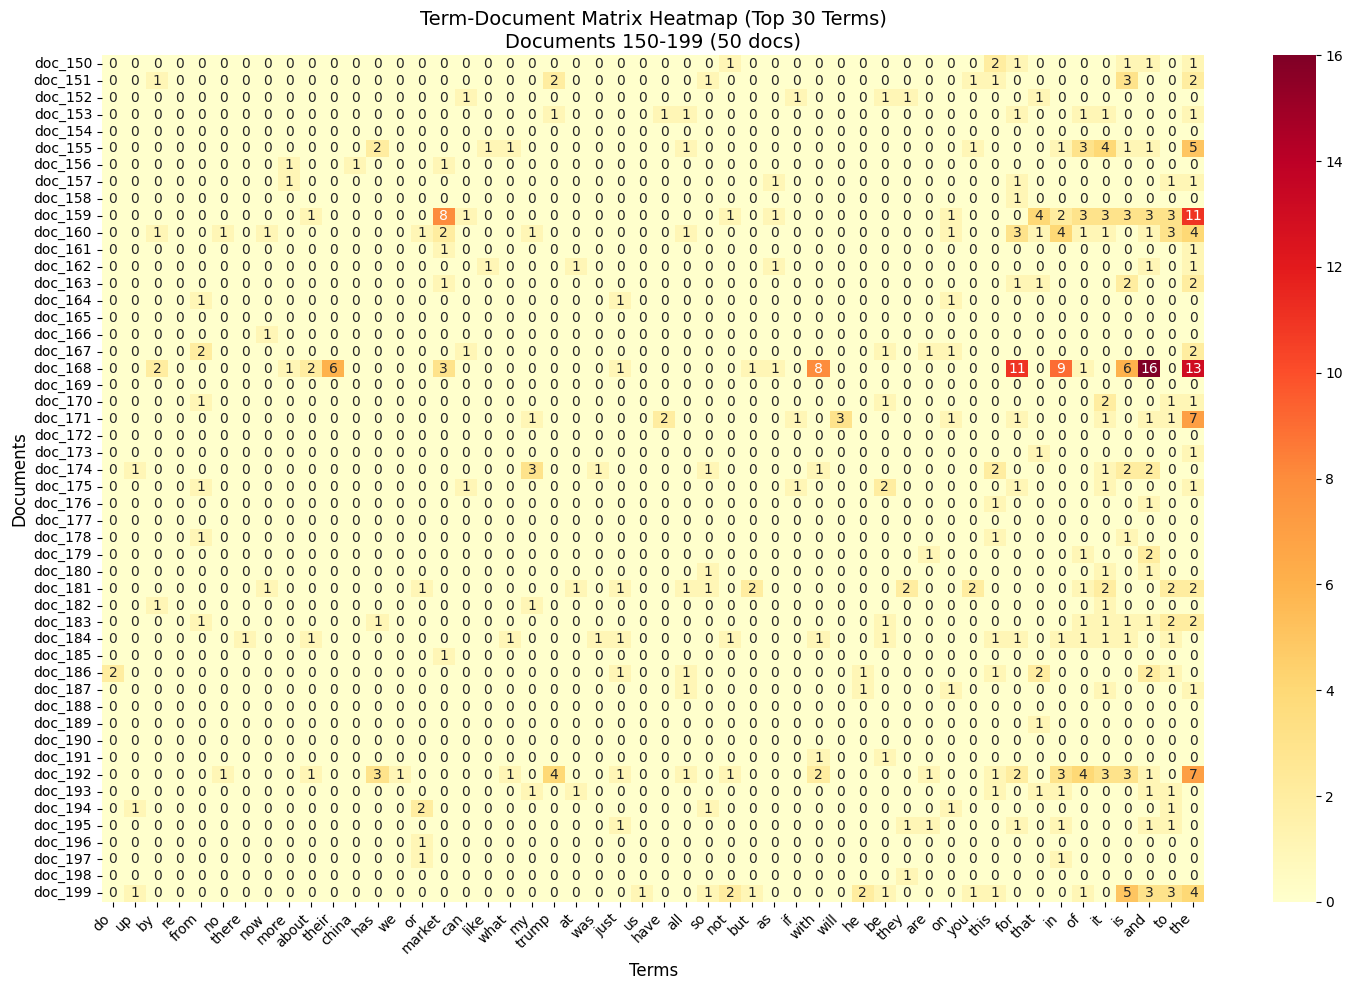

Plot 5: Documents 200 to 249 (Total 50 docs)


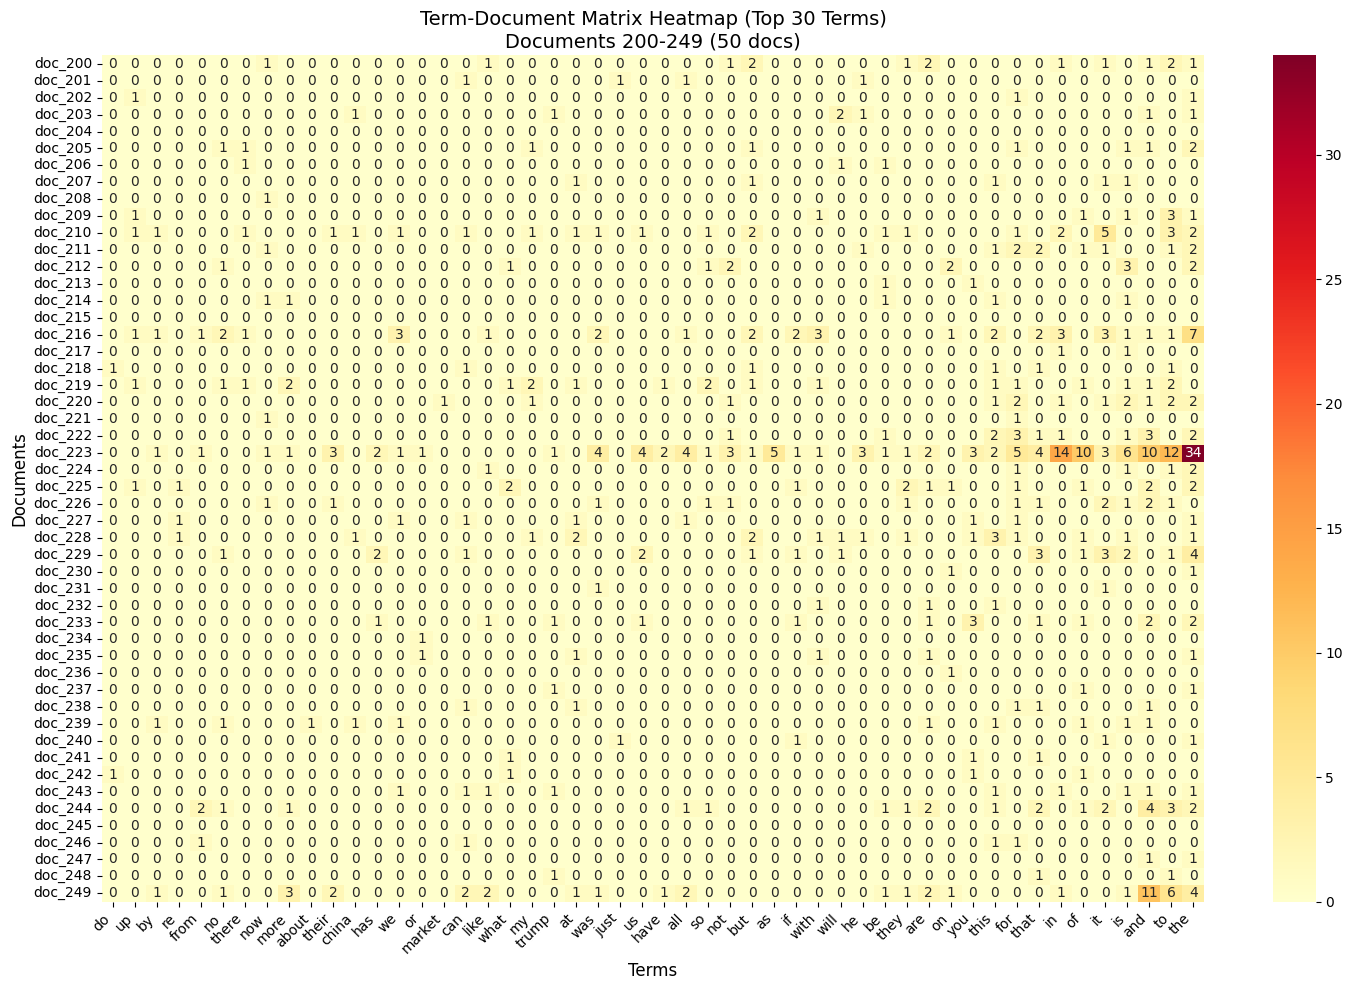

There are 824 documents, which will be divided into 17 plots.
Plot 1: Documents 0 to 49 (Total 50 docs)


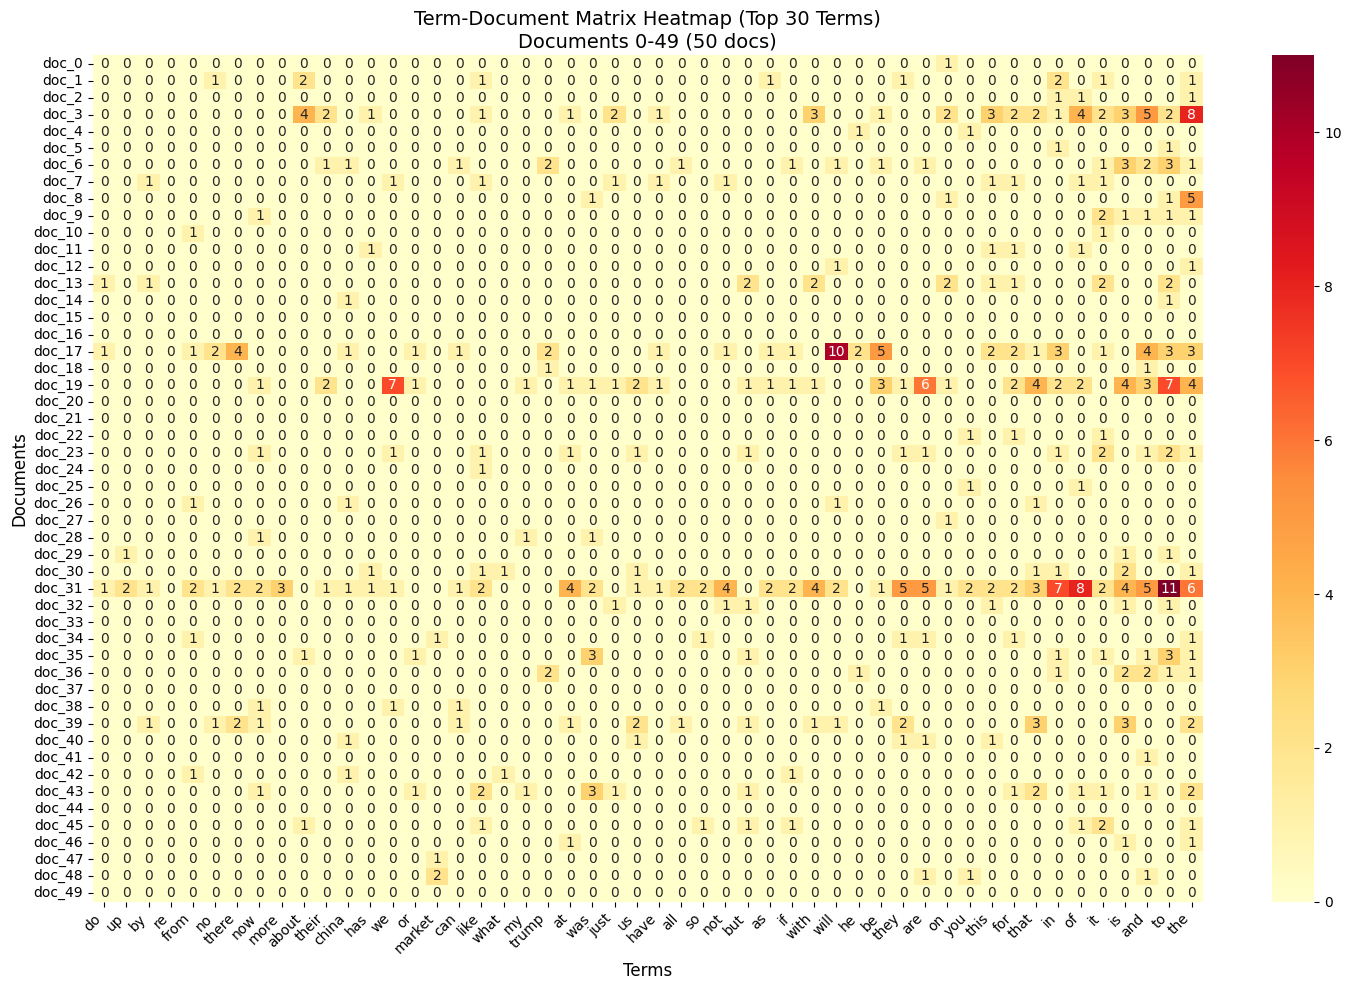

Plot 2: Documents 50 to 99 (Total 50 docs)


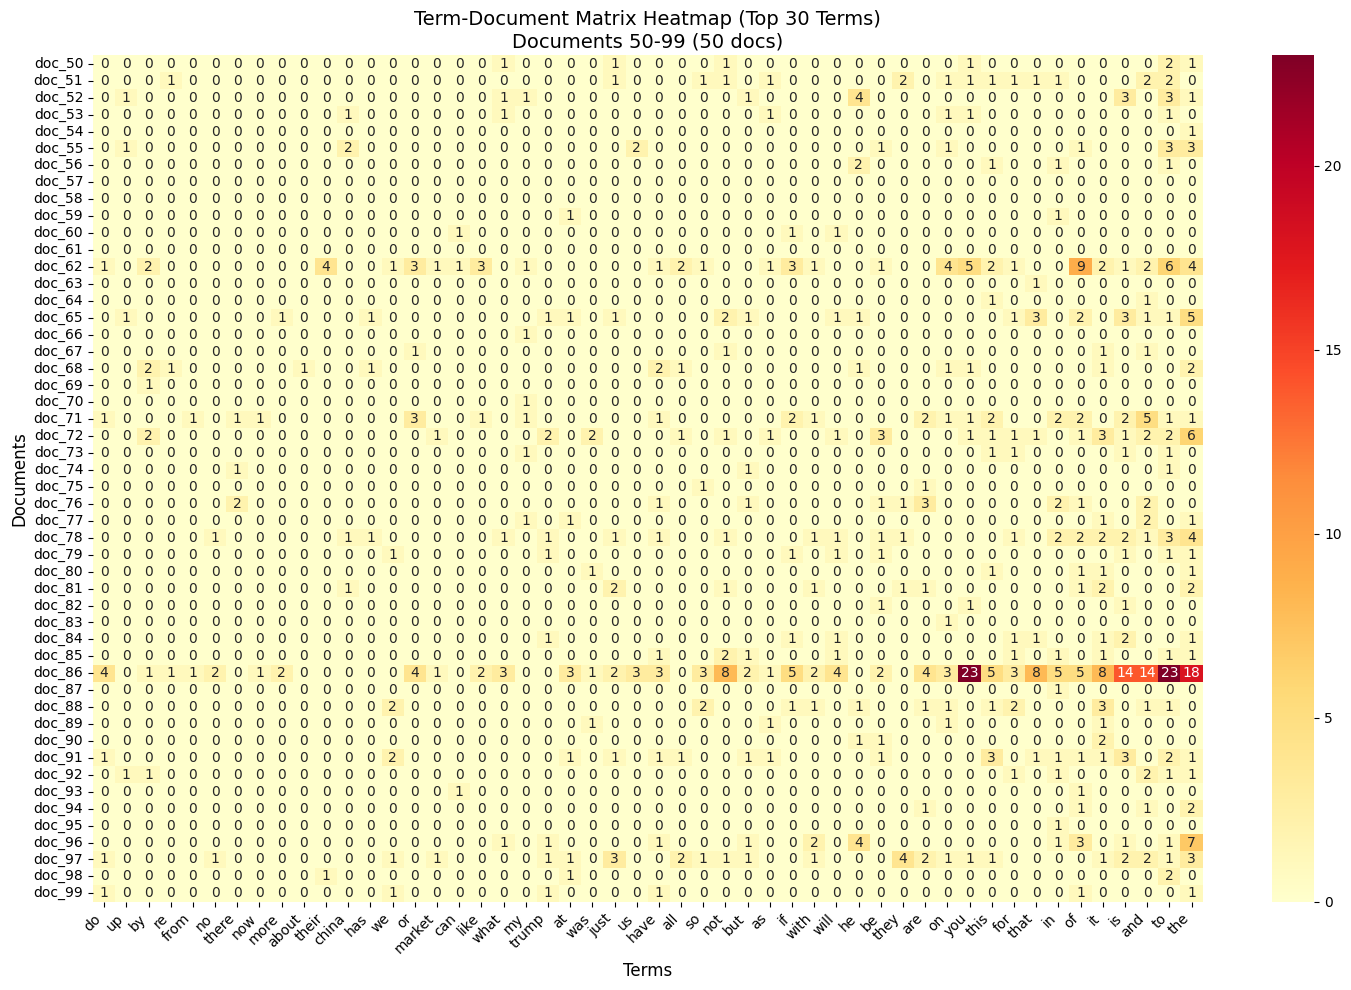

Plot 3: Documents 100 to 149 (Total 50 docs)


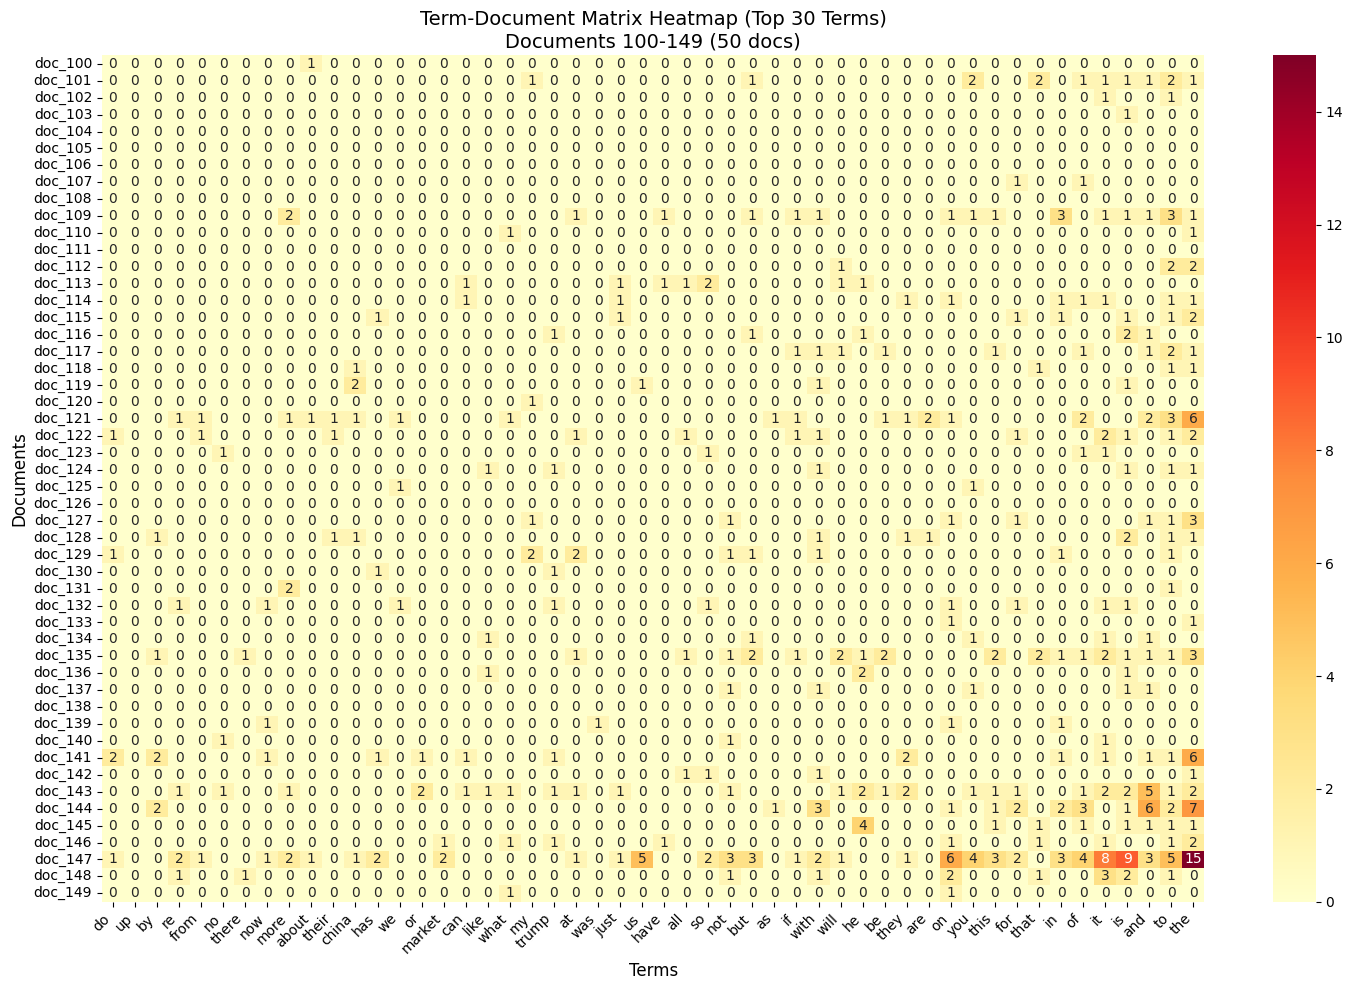

Plot 4: Documents 150 to 199 (Total 50 docs)


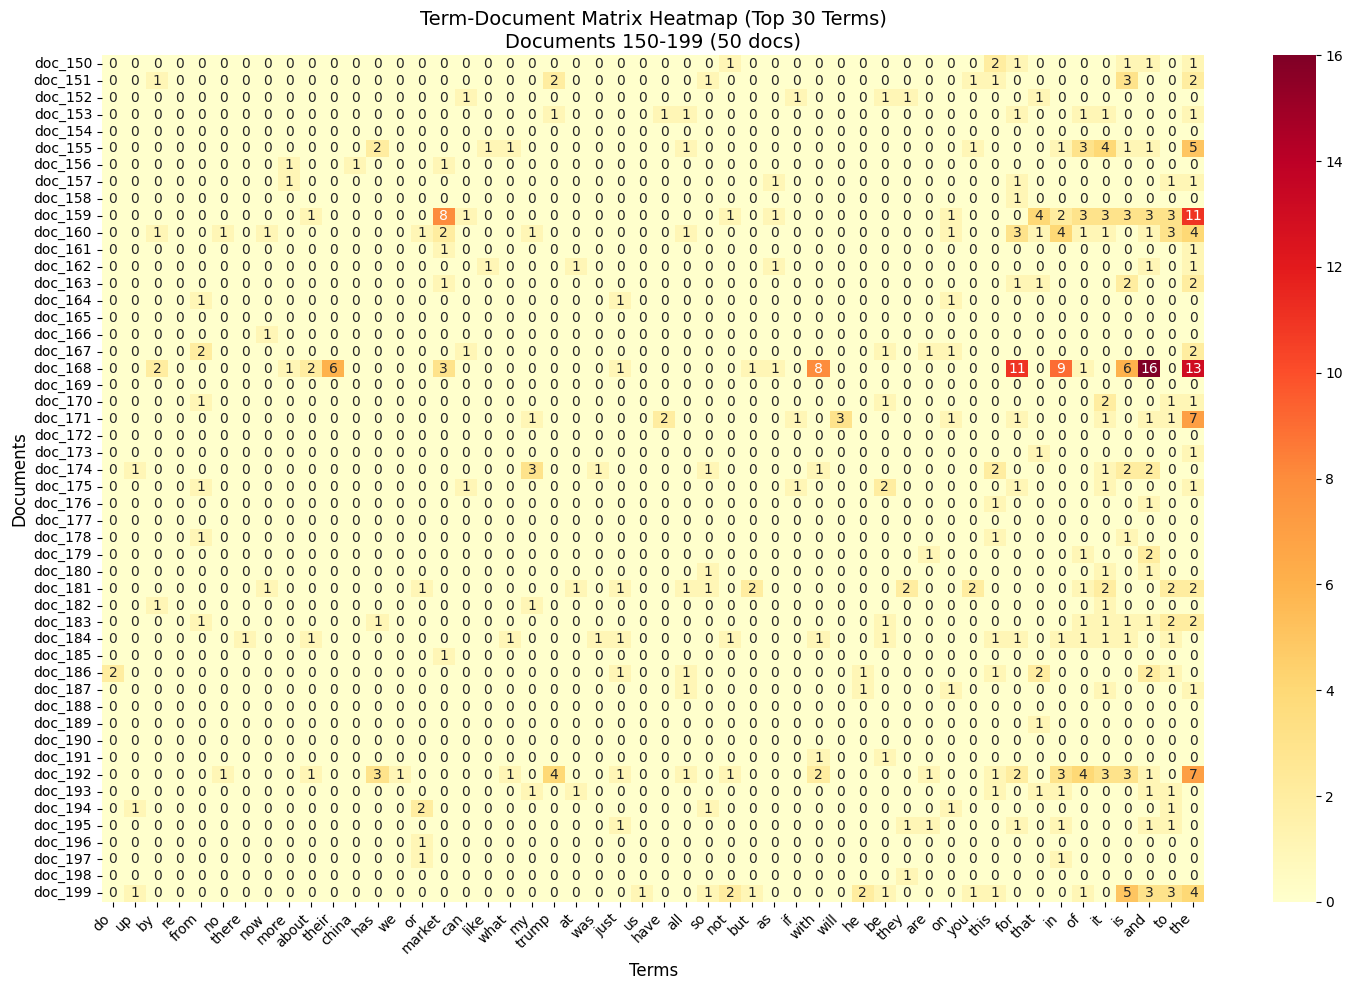

Plot 5: Documents 200 to 249 (Total 50 docs)


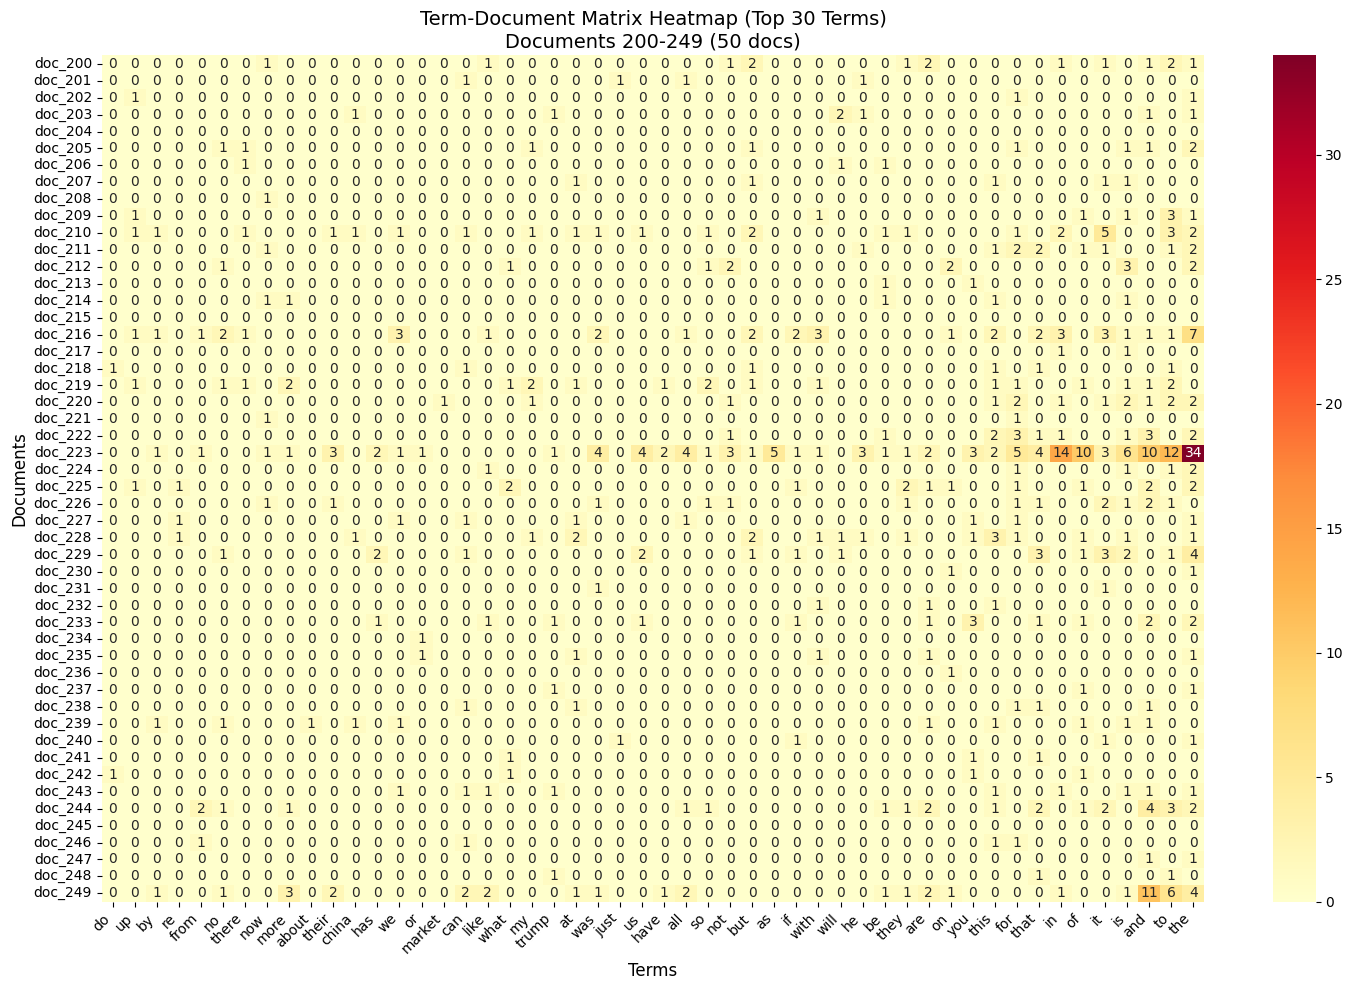

Plot 6: Documents 250 to 299 (Total 50 docs)


In [ ]:
# >>> Exercise 11
# 選擇出現頻率最高的詞項來增加非零值密度，並分成多張圖表
# Select the most frequent terms to increase the density of non-zero values ​​and divide them into multiple charts

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Calculate the total frequency of each term
term_frequencies = np.array(X_counts.sum(axis=0))[0]

# Find the 50 most frequent terms
top_terms_indices = np.argsort(term_frequencies)[-50:]  # - means ascending order
top_terms_names = [count_vect.get_feature_names_out()[i] for i in top_terms_indices]

# 50 articles per chart. If there are less than 50 articles, one chart is required.
docs_per_plot = 50
total_docs = X_counts.shape[0]
num_plots = math.ceil(total_docs / docs_per_plot)
print(f"There are {total_docs} documents, which will be divided into {num_plots} plots.")

# Create heatmaps for each plot
for plot_idx in range(num_plots):
    # Calculate the document range for the current plot
    start_doc = plot_idx * docs_per_plot
    end_doc = min((plot_idx + 1) * docs_per_plot, total_docs)
    current_n_docs = end_doc - start_doc

    print(f"Plot {plot_idx + 1}: Documents {start_doc} to {end_doc-1} (Total {current_n_docs} docs)")
    
    plot_x = [str(i) for i in top_terms_names]
    plot_y = [f'doc_{i}' for i in range(start_doc, end_doc)]

    # Extract the corresponding matrix data
    plot_z = X_counts[start_doc:end_doc, top_terms_indices].toarray()

    # Create heatmap
    df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

    # Adjust figure size (dynamically adjust height based on number of documents)
    fig_height = max(6, current_n_docs * 0.2)  # Minimum height 6, 0.2 height per document
    plt.figure(figsize=(15, fig_height))
    
    ax = sns.heatmap(df_todraw,
                     cmap="YlOrRd",
                     annot=True,
                     cbar=True,
                     xticklabels=True,
                     yticklabels=True,
                     fmt='g')
    
    plt.title(f'Term-Document Matrix Heatmap (Top 30 Terms)\nDocuments {start_doc}-{end_doc-1} ({current_n_docs} docs)', 
              fontsize=14)
    plt.xlabel('Terms', fontsize=12)
    plt.ylabel('Documents', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

### 5.4 Atrribute Transformation / Aggregation
#### 5.4.1 Transform Text Data

In [ ]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

np.int64(4)

In [ ]:
# >>> Exercise 14
import plotly as plty
import numpy as np

# use the previously computed term_frequencies and count_vect
# Select the top N terms with the highest frequency
n_terms = 100
top_indices = np.argsort(term_frequencies)[-n_terms:][::-1]  # Descending order
top_terms = count_vect.get_feature_names_out()[top_indices]
top_frequencies = term_frequencies[top_indices]

fig = plty.graph_objects.Figure(data=[
    plty.graph_objects.Bar(
        x=top_terms,
        y=top_frequencies,
        text=top_frequencies,
        textposition='auto',
        marker=dict(
            color=top_frequencies,
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Frequency")
        )
    )
])

fig.update_layout(
    title=f'Top {n_terms} Term Frequencies (Interactive)',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,
    width=2000,
    height=600,
    showlegend=False
)

fig.show()


In [ ]:
# Exercise 15 take log
import plotly as plty
import numpy as np
import math

# Compute the logarithm of term frequencies
term_frequencies_log = np.array([math.log(i) for i in term_frequencies])

# use the previously computed term_frequencies_log and count_vect
# Select the top N terms with the highest frequency
n_terms = 300
top_indices = np.argsort(term_frequencies_log)[-n_terms:][::-1]  # Descending order
top_terms = count_vect.get_feature_names_out()[top_indices]
top_frequencies = term_frequencies_log[top_indices]

fig = plty.graph_objects.Figure(data=[
    plty.graph_objects.Bar(
        x=top_terms,
        y=top_frequencies,
        text=top_frequencies,
        textposition='auto',
        marker=dict(
            color=top_frequencies,
            colorscale='Viridis',
            showscale=True,
            colorbar=dict(title="Frequency")
        )
    )
])

fig.update_layout(
    title=f'Top {n_terms} Term Frequencies (Interactive)',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,
    width=2000,
    height=600,
    showlegend=False
)

fig.show()

In [ ]:
# Create date-based sentiment trend analysis - weekly aggregation
# Chart 1: Weekly Sentiment Trend (Line Chart)
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Aggregate by date and sentiment category
daily_sentiment = X.groupby(['datetime', 'category_name']).size().reset_index(name='count')
date_sentiment_daily = daily_sentiment.pivot(index='datetime', columns='category_name', values='count').fillna(0)

# Ensure all sentiment categories exist
for sentiment in ['positive', 'negative', 'neutral']:
    if sentiment not in date_sentiment_daily.columns:
        date_sentiment_daily[sentiment] = 0

# Reindex to fill missing dates
date_range = pd.date_range(start=date_sentiment_daily.index.min(), 
                          end=date_sentiment_daily.index.max(), 
                          freq='D')
date_sentiment_daily = date_sentiment_daily.reindex(date_range, fill_value=0)

# Create weekly aggregation (7-day periods)
date_sentiment_daily['week_start'] = date_sentiment_daily.index - pd.to_timedelta(date_sentiment_daily.index.dayofweek, unit='d')

# Aggregate by week
weekly_sentiment = date_sentiment_daily.groupby('week_start').agg({
    'positive': 'sum',
    'negative': 'sum', 
    'neutral': 'sum'
}).reset_index()

print("=== Weekly Sentiment Data Summary ===")
print(f"Number of weeks: {len(weekly_sentiment)}")
print(f"Time range: {weekly_sentiment['week_start'].min()} to {weekly_sentiment['week_start'].max()}")

# Chart 1: Weekly Sentiment Trend (Line Chart)
fig1 = go.Figure()

# Add positive sentiment trend line
fig1.add_trace(go.Scatter(
    x=weekly_sentiment['week_start'],
    y=weekly_sentiment['positive'],
    mode='lines+markers',
    name='Positive',
    line=dict(color='green', width=3),
    marker=dict(size=8, symbol='circle'),
    hovertemplate='<b>Positive</b><br>Week: %{x}<br>Count: %{y}<extra></extra>'
))

# Add negative sentiment trend line
fig1.add_trace(go.Scatter(
    x=weekly_sentiment['week_start'],
    y=weekly_sentiment['negative'],
    mode='lines+markers',
    name='Negative',
    line=dict(color='red', width=3),
    marker=dict(size=8, symbol='square'),
    hovertemplate='<b>Negative</b><br>Week: %{x}<br>Count: %{y}<extra></extra>'
))

# Add neutral sentiment trend line
fig1.add_trace(go.Scatter(
    x=weekly_sentiment['week_start'],
    y=weekly_sentiment['neutral'],
    mode='lines+markers',
    name='Neutral',
    line=dict(color='blue', width=3),
    marker=dict(size=8, symbol='triangle-up'),
    hovertemplate='<b>Neutral</b><br>Week: %{x}<br>Count: %{y}<extra></extra>'
))

# Update layout for first chart
fig1.update_layout(
    title={
        'text': 'Weekly Stock Sentiment Trend Analysis<br>Reddit Stock Discussion Sentiment Changes (7-day aggregation)',
        'x': 0.5,
        'y': 0.94,
        'xanchor': 'center',
        'font': {'size': 18}
    },
    xaxis_title='Week Start Date',
    yaxis_title='Post Count',
    width=1200,
    height=600,
    hovermode='x unified',
    legend=dict(
        title='Sentiment Categories',
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="right",
        x=1
    ),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    plot_bgcolor='white'
)

# Display first chart
fig1.show()

# Display statistical summary
print("\n=== Weekly Sentiment Trend Analysis Summary ===")
print(f"Analysis weeks: {len(weekly_sentiment)}")
print(f"Time range: {weekly_sentiment['week_start'].min().strftime('%Y-%m-%d')} to {weekly_sentiment['week_start'].max().strftime('%Y-%m-%d')}")

print(f"\nWeekly totals by sentiment category:")
for sentiment in ['positive', 'negative', 'neutral']:
    total = weekly_sentiment[sentiment].sum()
    avg_weekly = total / len(weekly_sentiment)
    max_week = weekly_sentiment[sentiment].max()
    print(f"- {sentiment.capitalize()} sentiment: Total {total} posts (Average per week: {avg_weekly:.1f}, Highest week: {max_week})")

# Find peak sentiment weeks
max_positive_week = weekly_sentiment.loc[weekly_sentiment['positive'].idxmax(), 'week_start']
max_negative_week = weekly_sentiment.loc[weekly_sentiment['negative'].idxmax(), 'week_start']  
max_neutral_week = weekly_sentiment.loc[weekly_sentiment['neutral'].idxmax(), 'week_start']

print(f"\nPeak sentiment weeks:")
print(f"- Highest positive sentiment week: {max_positive_week.strftime('%Y-%m-%d')} ({weekly_sentiment.loc[weekly_sentiment['positive'].idxmax(), 'positive']} posts)")
print(f"- Highest negative sentiment week: {max_negative_week.strftime('%Y-%m-%d')} ({weekly_sentiment.loc[weekly_sentiment['negative'].idxmax(), 'negative']} posts)")
print(f"- Highest neutral sentiment week: {max_neutral_week.strftime('%Y-%m-%d')} ({weekly_sentiment.loc[weekly_sentiment['neutral'].idxmax(), 'neutral']} posts)")

=== Weekly Sentiment Data Summary ===
Number of weeks: 220
Time range: 2021-01-25 00:00:00 to 2025-04-07 00:00:00



=== Weekly Sentiment Trend Analysis Summary ===
Analysis weeks: 220
Time range: 2021-01-25 to 2025-04-07

Weekly totals by sentiment category:
- Positive sentiment: Total 108.0 posts (Average per week: 0.5, Highest week: 61.0)
- Negative sentiment: Total 315.0 posts (Average per week: 1.4, Highest week: 283.0)
- Neutral sentiment: Total 401.0 posts (Average per week: 1.8, Highest week: 276.0)

Peak sentiment weeks:
- Highest positive sentiment week: 2025-04-07 (61.0 posts)
- Highest negative sentiment week: 2025-04-07 (283.0 posts)
- Highest neutral sentiment week: 2025-04-07 (276.0 posts)


In [30]:
# Chart 2: Weekly Sentiment Proportion (Stacked Bar Chart)
import plotly.graph_objects as go

# Calculate weekly sentiment ratios
weekly_sentiment['positive_ratio'] = (weekly_sentiment['positive'] / (weekly_sentiment['positive'] + weekly_sentiment['negative'] + weekly_sentiment['neutral']) * 100).fillna(0)
weekly_sentiment['negative_ratio'] = (weekly_sentiment['negative'] / (weekly_sentiment['positive'] + weekly_sentiment['negative'] + weekly_sentiment['neutral']) * 100).fillna(0)
weekly_sentiment['neutral_ratio'] = (weekly_sentiment['neutral'] / (weekly_sentiment['positive'] + weekly_sentiment['negative'] + weekly_sentiment['neutral']) * 100).fillna(0)

# Create second chart: stacked bar chart (proportions)
fig2 = go.Figure()

fig2.add_trace(go.Bar(
    x=weekly_sentiment['week_start'],
    y=weekly_sentiment['positive_ratio'],
    name='Positive',
    marker_color='green',
    hovertemplate='<b>Positive</b><br>Week: %{x}<br>Percentage: %{y:.1f}%<extra></extra>'
))

fig2.add_trace(go.Bar(
    x=weekly_sentiment['week_start'],
    y=weekly_sentiment['negative_ratio'],
    name='Negative',
    marker_color='red',
    hovertemplate='<b>Negative</b><br>Week: %{x}<br>Percentage: %{y:.1f}%<extra></extra>'
))

fig2.add_trace(go.Bar(
    x=weekly_sentiment['week_start'],
    y=weekly_sentiment['neutral_ratio'],
    name='Neutral',
    marker_color='blue',
    hovertemplate='<b>Neutral</b><br>Week: %{x}<br>Percentage: %{y:.1f}%<extra></extra>'
))

# Update layout for second chart
fig2.update_layout(
    title={
        'text': 'Weekly Stock Sentiment Proportion Analysis<br>Reddit Stock Discussion Sentiment Distribution (7-day aggregation)',
        'x': 0.5,
        'y': 0.94,
        'xanchor': 'center',
        'font': {'size': 18}
    },
    xaxis_title='Week Start Date',
    yaxis_title='Percentage (%)',
    width=1200,
    height=600,
    hovermode='x unified',
    barmode='stack',
    legend=dict(
        title='Sentiment Categories',
        orientation="h",
        yanchor="bottom",
        y=1,
        xanchor="right",
        x=1
    ),
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='rgba(128,128,128,0.2)'
    ),
    plot_bgcolor='white'
)

# Display second chart
fig2.show()

# Display proportion analysis summary
print("\n=== Weekly Sentiment Proportion Analysis Summary ===")
print(f"Average sentiment proportions across all weeks:")
print(f"- Positive sentiment: {weekly_sentiment['positive_ratio'].mean():.1f}%")
print(f"- Negative sentiment: {weekly_sentiment['negative_ratio'].mean():.1f}%")
print(f"- Neutral sentiment: {weekly_sentiment['neutral_ratio'].mean():.1f}%")

print(f"\nOverall sentiment distribution:")
total_positive = weekly_sentiment['positive'].sum()
total_negative = weekly_sentiment['negative'].sum()
total_neutral = weekly_sentiment['neutral'].sum()
total_posts = total_positive + total_negative + total_neutral

print(f"- Positive: {total_positive:.0f} posts ({total_positive/total_posts*100:.1f}%)")
print(f"- Negative: {total_negative:.0f} posts ({total_negative/total_posts*100:.1f}%)")
print(f"- Neutral: {total_neutral:.0f} posts ({total_neutral/total_posts*100:.1f}%)")
print(f"- Total: {total_posts:.0f} posts")


=== Weekly Sentiment Proportion Analysis Summary ===
Average sentiment proportions across all weeks:
- Positive sentiment: 9.6%
- Negative sentiment: 3.0%
- Neutral sentiment: 21.9%

Overall sentiment distribution:
- Positive: 108 posts (13.1%)
- Negative: 315 posts (38.2%)
- Neutral: 401 posts (48.7%)
- Total: 824 posts


### Chart1 & Chart2
根據論壇的每周情緒變化畫出趨勢圖，大多時候以數量而言皆無明顯變化 (Chart1)，頂多占比變化 (Chart2)，最大變化發生在今年 (2025) 的四月，美國總統宣布將徵收全球關稅時，顯示發生黑天鵝事件時，造成的大量討論以及對市場的負面看法。

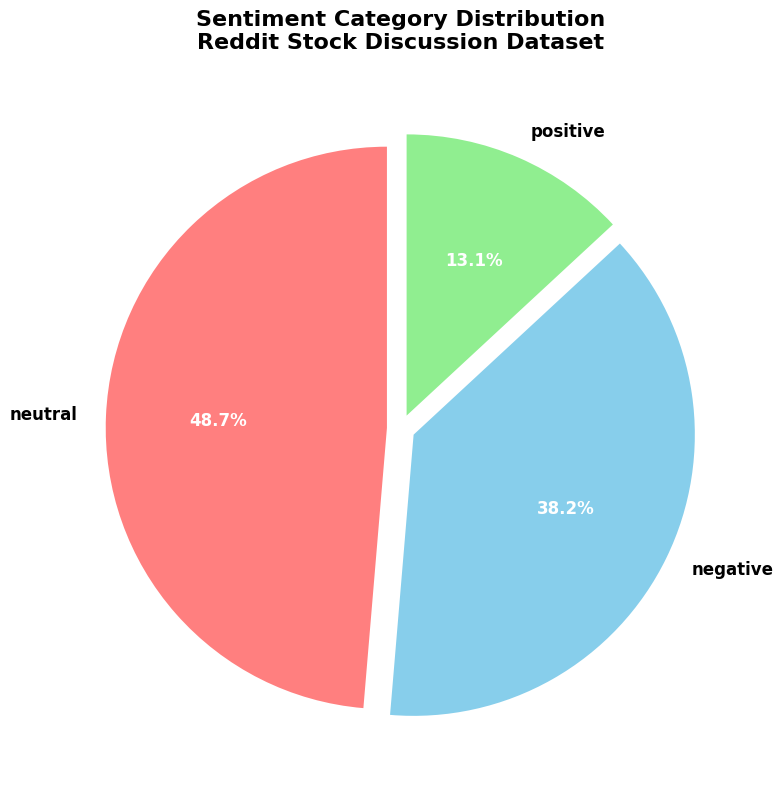

=== Sentiment Distribution Summary ===
- Neutral: 401 posts (48.7%)
- Negative: 315 posts (38.2%)
- Positive: 108 posts (13.1%)
Total posts: 824


In [ ]:
# Chart 3: Sentiment Category Distribution (Pie Chart)
import plotly.graph_objects as go

# Calculate sentiment distribution
sentiment_counts = X['category_name'].value_counts()
colors = ['#ff7f7f', '#87ceeb', '#90ee90']  # Red, Blue, Green

fig_pie = go.Figure(data=[go.Pie(
    labels=sentiment_counts.index,
    values=sentiment_counts.values,
    hole=0.3,
    marker_colors=['red', 'blue', 'green'],
    textinfo='label+percent+value',
    textfont_size=12,
    pull=[0.05, 0.05, 0.05]
)])

fig_pie.update_layout(
    title={
        'text': 'Interactive Sentiment Distribution<br>Reddit Stock Discussion Dataset',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 18}
    },
    width=800,
    height=600,
    showlegend=True,
    legend=dict(orientation="v", yanchor="middle", y=0.5, xanchor="left", x=1.05)
)

fig_pie.show()

print("=== Sentiment Distribution Summary ===")
total_posts = len(X)
for sentiment, count in sentiment_counts.items():
    percentage = (count / total_posts) * 100
    print(f"- {sentiment.capitalize()}: {count} posts ({percentage:.1f}%)")
print(f"Total posts: {total_posts}")

In [36]:
# Create additional features for text analysis
# Calculate text length and token count for each record

# Add text length feature (character count)
X['text_length'] = X['text'].str.len()

# Add token count feature (word count after tokenization)
X['token_count'] = X['unigrams'].apply(len)

print("=== Text Features Added ===")
print(f"Text length feature added: min={X['text_length'].min()}, max={X['text_length'].max()}, mean={X['text_length'].mean():.1f}")
print(f"Token count feature added: min={X['token_count'].min()}, max={X['token_count'].max()}, mean={X['token_count'].mean():.1f}")
print(f"Dataset shape after adding features: {X.shape}")

=== Text Features Added ===
Text length feature added: min=1, max=2753, mean=148.1
Token count feature added: min=1, max=554, mean=31.1
Dataset shape after adding features: (824, 7)


C:\Users\ybcvx\AppData\Local\Temp\ipykernel_22136\1715631851.py:14: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



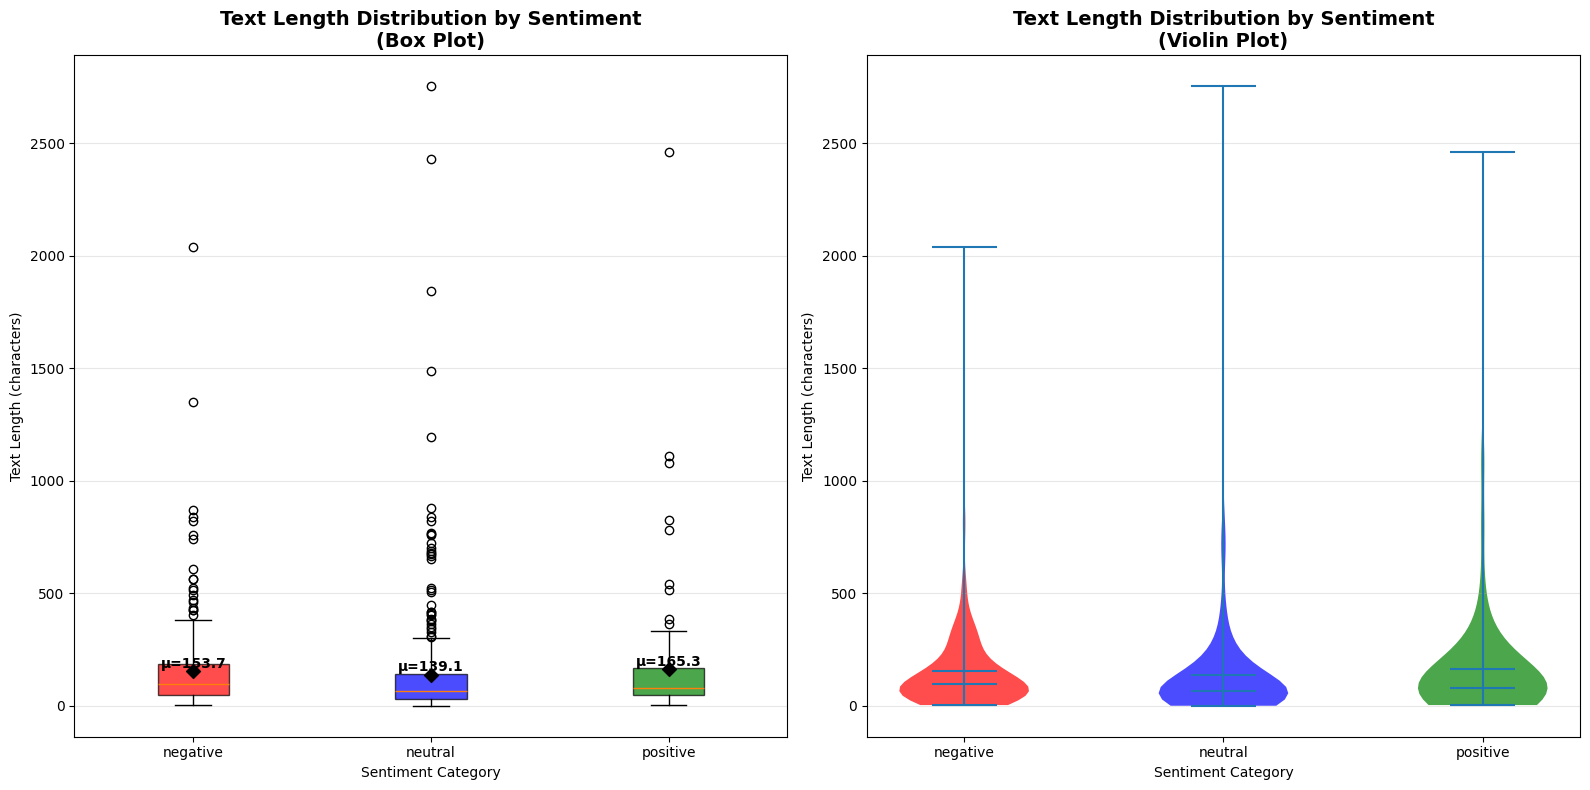

=== Text Length Statistics by Sentiment ===

Negative sentiment:
  Count: 315
  Mean: 153.7 characters
  Median: 96.0 characters
  Std Dev: 192.1 characters
  Min: 4 characters
  Max: 2040 characters
  Q1 (25%): 47.5 characters
  Q3 (75%): 184.5 characters
  IQR: 137.0 characters

Neutral sentiment:
  Count: 401
  Mean: 139.1 characters
  Median: 68.0 characters
  Std Dev: 259.3 characters
  Min: 1 characters
  Max: 2753 characters
  Q1 (25%): 32.0 characters
  Q3 (75%): 141.0 characters
  IQR: 109.0 characters

Positive sentiment:
  Count: 108
  Mean: 165.3 characters
  Median: 81.5 characters
  Std Dev: 293.4 characters
  Min: 4 characters
  Max: 2461 characters
  Q1 (25%): 48.0 characters
  Q3 (75%): 167.2 characters
  IQR: 119.2 characters


In [37]:
# Chart 4: Text Length Distribution (Box Plot)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

sentiment_order = ['negative', 'neutral', 'positive']
text_data_by_sentiment = [X[X['category_name'] == sentiment]['text_length'].values 
                          for sentiment in sentiment_order]
colors = ['red', 'blue', 'green']

fig4, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Box plot for text length distribution
bp1 = ax1.boxplot(text_data_by_sentiment, labels=sentiment_order, patch_artist=True)

for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Text Length Distribution by Sentiment\n(Box Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment Category')
ax1.set_ylabel('Text Length (characters)')
ax1.grid(True, alpha=0.3, axis='y')

means = [np.mean(data) for data in text_data_by_sentiment]
ax1.scatter(range(1, len(means) + 1), means, color='black', marker='D', s=50, zorder=3)
for i, mean_val in enumerate(means):
    ax1.text(i + 1, mean_val + 1, f'μ={mean_val:.1f}', 
             ha='center', va='bottom', fontweight='bold')

# Violin plot for better distribution visualization
parts = ax2.violinplot(text_data_by_sentiment, positions=range(1, len(sentiment_order) + 1),
                      showmeans=True, showmedians=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

ax2.set_title('Text Length Distribution by Sentiment\n(Violin Plot)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment Category')
ax2.set_ylabel('Text Length (characters)')
ax2.set_xticks(range(1, len(sentiment_order) + 1))
ax2.set_xticklabels(sentiment_order)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Interactive box plot with Plotly
fig_box = go.Figure()

for i, sentiment in enumerate(sentiment_order):
    data = X[X['category_name'] == sentiment]['text_length']
    
    fig_box.add_trace(go.Box(
        y=data,
        name=sentiment.capitalize(),
        marker_color=colors[i],
        boxpoints='outliers',
        jitter=0.3,
        pointpos=-1.8,
        hovertemplate=f'<b>{sentiment.capitalize()}</b><br>' +
                     'Text Length: %{y}<br>' +
                     '<extra></extra>'
    ))

fig_box.update_layout(
    title={
        'text': 'Interactive Text Length Distribution by Sentiment<br>Box Plot with Outliers',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Sentiment Category',
    yaxis_title='Text Length (characters)',
    width=800,
    height=600,
    plot_bgcolor='white',
    yaxis=dict(gridcolor='rgba(128,128,128,0.2)')
)

fig_box.show()

# Statistical summary for text lengths
print("=== Text Length Statistics by Sentiment ===")
text_stats = X.groupby('category_name')['text_length'].describe()

for sentiment in sentiment_order:
    stats = text_stats.loc[sentiment]
    print(f"\n{sentiment.capitalize()} sentiment:")
    print(f"  Count: {stats['count']:.0f}")
    print(f"  Mean: {stats['mean']:.1f} characters")
    print(f"  Median: {stats['50%']:.1f} characters")
    print(f"  Std Dev: {stats['std']:.1f} characters")
    print(f"  Min: {stats['min']:.0f} characters")
    print(f"  Max: {stats['max']:.0f} characters")
    print(f"  Q1 (25%): {stats['25%']:.1f} characters")
    print(f"  Q3 (75%): {stats['75%']:.1f} characters")
    print(f"  IQR: {stats['75%'] - stats['25%']:.1f} characters")

C:\Users\ybcvx\AppData\Local\Temp\ipykernel_22136\3342763714.py:15: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



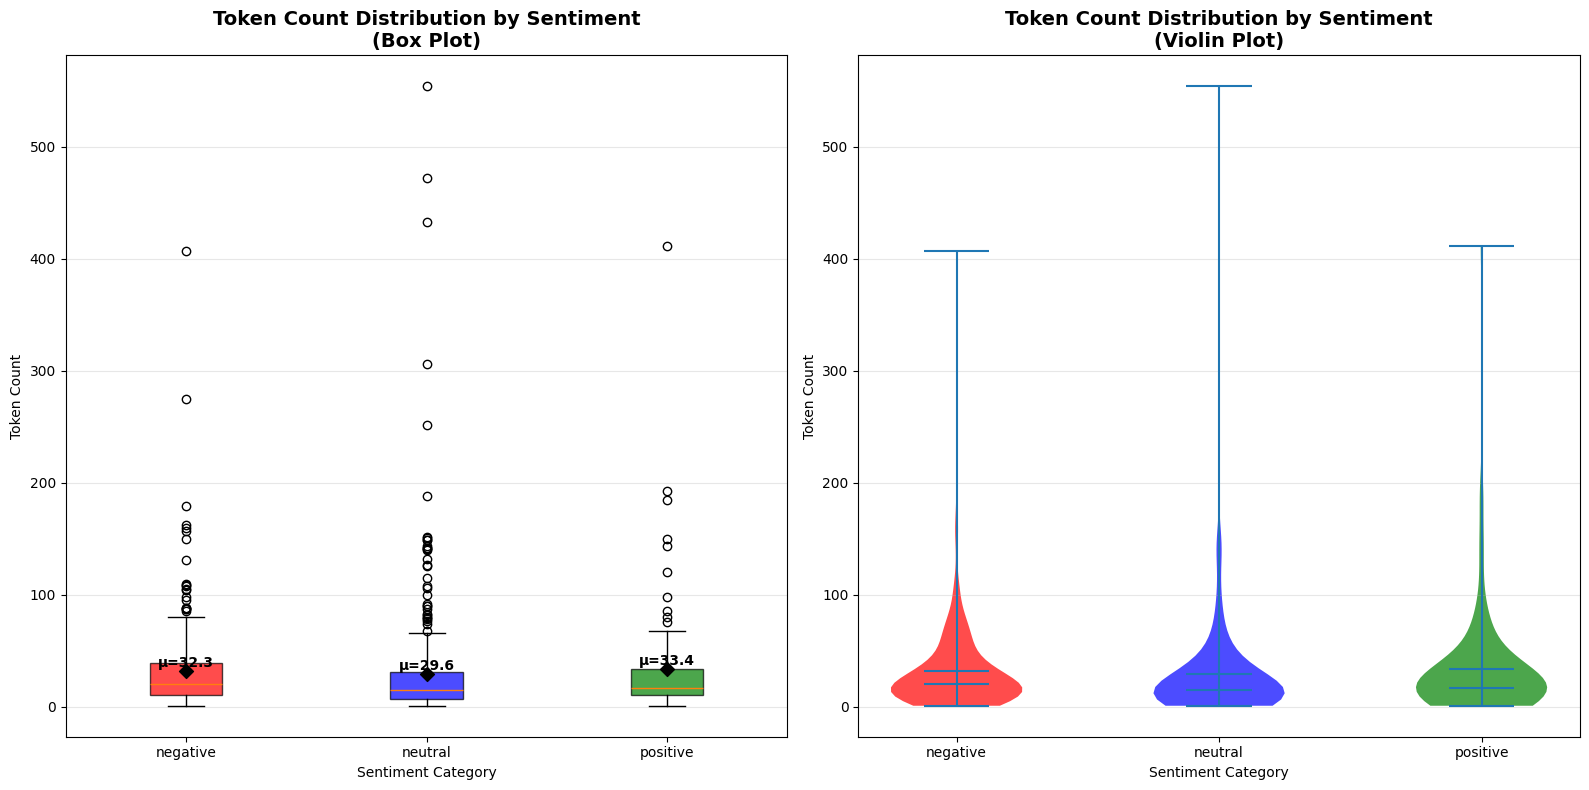

=== Token Count Statistics by Sentiment ===

Negative sentiment:
  Count: 315
  Mean: 32.3 tokens
  Median: 20.0 tokens
  Std Dev: 38.9 tokens
  Min: 1 tokens
  Max: 407 tokens
  Q1 (25%): 11.0 tokens
  Q3 (75%): 39.5 tokens
  IQR: 28.5 tokens

Neutral sentiment:
  Count: 401
  Mean: 29.6 tokens
  Median: 15.0 tokens
  Std Dev: 53.0 tokens
  Min: 1 tokens
  Max: 554 tokens
  Q1 (25%): 7.0 tokens
  Q3 (75%): 31.0 tokens
  IQR: 24.0 tokens

Positive sentiment:
  Count: 108
  Mean: 33.4 tokens
  Median: 17.0 tokens
  Std Dev: 50.7 tokens
  Min: 1 tokens
  Max: 411 tokens
  Q1 (25%): 11.0 tokens
  Q3 (75%): 34.0 tokens
  IQR: 23.0 tokens


In [38]:
# Chart 5: Token Count Distribution (Box Plot)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

# Prepare data for box plots
sentiment_order = ['negative', 'neutral', 'positive']
token_data_by_sentiment = [X[X['category_name'] == sentiment]['token_count'].values 
                          for sentiment in sentiment_order]
colors = ['red', 'blue', 'green']

fig4, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Box plot for token count distribution
bp1 = ax1.boxplot(token_data_by_sentiment, labels=sentiment_order, patch_artist=True)

for patch, color in zip(bp1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.set_title('Token Count Distribution by Sentiment\n(Box Plot)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment Category')
ax1.set_ylabel('Token Count')
ax1.grid(True, alpha=0.3, axis='y')

means = [np.mean(data) for data in token_data_by_sentiment]
ax1.scatter(range(1, len(means) + 1), means, color='black', marker='D', s=50, zorder=3)
for i, mean_val in enumerate(means):
    ax1.text(i + 1, mean_val + 1, f'μ={mean_val:.1f}', 
             ha='center', va='bottom', fontweight='bold')

# Violin plot for better distribution visualization
parts = ax2.violinplot(token_data_by_sentiment, positions=range(1, len(sentiment_order) + 1),
                      showmeans=True, showmedians=True)

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.7)

ax2.set_title('Token Count Distribution by Sentiment\n(Violin Plot)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment Category')
ax2.set_ylabel('Token Count')
ax2.set_xticks(range(1, len(sentiment_order) + 1))
ax2.set_xticklabels(sentiment_order)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Interactive box plot with Plotly
fig_box = go.Figure()

for i, sentiment in enumerate(sentiment_order):
    data = X[X['category_name'] == sentiment]['token_count']
    
    fig_box.add_trace(go.Box(
        y=data,
        name=sentiment.capitalize(),
        marker_color=colors[i],
        boxpoints='outliers',
        jitter=0.3,
        pointpos=-1.8,
        hovertemplate=f'<b>{sentiment.capitalize()}</b><br>' +
                     'Token Count: %{y}<br>' +
                     '<extra></extra>'
    ))

fig_box.update_layout(
    title={
        'text': 'Interactive Token Count Distribution by Sentiment<br>Box Plot with Outliers',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 16}
    },
    xaxis_title='Sentiment Category',
    yaxis_title='Token Count',
    width=800,
    height=600,
    plot_bgcolor='white',
    yaxis=dict(gridcolor='rgba(128,128,128,0.2)')
)

fig_box.show()

# Statistical summary for token counts
print("=== Token Count Statistics by Sentiment ===")
token_stats = X.groupby('category_name')['token_count'].describe()

for sentiment in sentiment_order:
    stats = token_stats.loc[sentiment]
    print(f"\n{sentiment.capitalize()} sentiment:")
    print(f"  Count: {stats['count']:.0f}")
    print(f"  Mean: {stats['mean']:.1f} tokens")
    print(f"  Median: {stats['50%']:.1f} tokens")
    print(f"  Std Dev: {stats['std']:.1f} tokens")
    print(f"  Min: {stats['min']:.0f} tokens")
    print(f"  Max: {stats['max']:.0f} tokens")
    print(f"  Q1 (25%): {stats['25%']:.1f} tokens")
    print(f"  Q3 (75%): {stats['75%']:.1f} tokens")
    print(f"  IQR: {stats['75%'] - stats['25%']:.1f} tokens")

# Phase 2

In [11]:
### Begin Assignment Here